# Мастерская: Анализ вакансий с сайта HH.ru

**Описание проекта**

В работе находятся данные о вакансиях Аналитиков данных и Специалистов по Data Science c сайта HH.ru

**Цель проекта:** Выявить различия в предлагаемых вакансиях для Аналитиков данных и Специалистов по Data Science.

**Описание данных**

- **Файл 'vacancies_da.xlsx'** - хранит данные о вакансиях Аналитиков данных <br>
- **Файл 'vacsancies_ds.xlsx'** - хранит данные о вакансиях Специалистов по Data Science <br>


**Структура 'vacancies_da.xlsx' и 'vacancies_ds.xlsx':**<br>
• **id** - Уникальный идентификатор вакансии.<br>
• **name** - Название вакансии.<br>
• **published_at** - Дата публикации.<br>
• **alternate_url** - Ссылка на вакансию.<br>
• **type** - Статус вакансии на момент получения данных от api и передачи их в базу.<br>
• **employer** - Работодатель.<br>
• **department** - Работодатель, отдел.<br>
• **area** - Регион места работы.<br>
• **experience** - Требуемый опыт работы.<br>
• **key_skills** - Ключевые навыки, в том числе найденные при анализе полного текста вакансии. Поле генерируется после полученияинформации от api.<br>
• **schedule** - График работы.<br>
• **employment** - Тип занятости.<br>
• **description** - Описание вакансии.<br>
• **description_lemmatized** - Лемматизированное описание вакансии.<br>
• **salary_from** - Нижняя граница предлагаемой заработной платы.<br>
• **salary_to** - Верхняя граница предлагаемой заработной платы.<br>
• **salary_bin** - Категория зарплаты.<br>
• **key_skills_from_key_skills_field** - Ключевые навыки из поля вакансии key_skills.<br>
• **hard_skills_from_description** - “Твердые” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api.<br> 
• **soft_skills_from_description** - “Мягкие” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api. <br>

**Этапы проектной работы:**
1. Загрузка и изучение данных.<br>
2. Предобработка данных.<br>
3. Исследовательский анализ данных.<br>
3.1. Выявление соотношения вакансий Аналитика данных и Специалист по Data Science;<br>
3.2. Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалист по Data Science; <br>
3.3. Определение типичного места работы для Аналитика данных и Специалиста по Data Science по следующим параметрам: ТОП-работодателей по числу вакансий, заработная плата, тип занятости, график работы, ТОП-городов (для Junior, Junior+, Middle, Senior); <br>
3.3.1. ТОП-работодателей;<br>
3.3.2. Заработная плата;<br>
3.3.3. Тип занятости;<br>
3.3.4. График работы;<br>
3.3.5. ТОП-городов;<br>
4. Навыки hard skills («твердые») и soft skills («мягкие»). <br>
4.1. Какие навыки спрашивают чаще?<br>
4.2. К какому грейду и к какой специальности требований больше?<br>
4.3. Cамые важные hard-skils, самые важные soft-skils. отдельно  по грейдам Junior, Junior+, Middle, Senior.<br>
5. Расчет помесячной динамики количества вакансий для Аналитика данных и Специалиста по Data Science для грейдов Junior, Junior+, Middle, Senior.<br>
6. Формулирование выводов и рекомендаций. <br>

# 1. Загрузка и изучение данных


In [1]:
# Импортируем библиотеки
import pandas as pd
import re  
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [2]:
v_da  = pd.read_excel('C:/Users/85fm/vacancies_da.xlsx') #открываем файл vacancies_da
v_ds = pd.read_excel('C:/Users/85fm/vacancies_ds.xlsx') #открываем файл vacancies_da

In [3]:
v_da.head(3) # выводим первые 3 строки таблицы v_da

id                                    name        published_at  \
0  100039284  Junior аналитик данных (исследователь) 2024-05-24 09:37:04   
1  100039480                         Аналитик данных 2024-05-24 09:39:00   
2  100042705         Аналитик данных (исследователь) 2024-05-24 10:01:25   

                     alternate_url      type           employer department  \
0  https://hh.ru/vacancy/100039284  Открытая  DNS Головной офис        NaN   
1  https://hh.ru/vacancy/100039480  Открытая              Комус        NaN   
2  https://hh.ru/vacancy/100042705  Открытая  DNS Головной офис        NaN   

          area             experience  \
0  Владивосток  Junior (no experince)   
1       Москва  Junior (no experince)   
2  Владивосток    Junior+ (1-3 years)   

                                          key_skills     schedule  \
0              ['Power BI', 'СУБД', 'Python', 'SQL']  Полный день   
1   ['MS SQL', 'Работа с базами данных', 'MS Excel']  Полный день   
2  ['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...  Полный день   

         employment                                        description  \
0  Полная занятость  наше направление занимается повышением эффекти...   
1  Полная занятость  сегодня комус один из крупнейших поставщиков о...   
2  Полная занятость  наше направление занимается повышением эффекти...   

                              description_lemmatized  salary_from  salary_to  \
0  наш направление заниматься повышение эффективн...      60000.0        NaN   
1  сегодня комус крупный поставщик офисный товар ...          NaN        NaN   
2  наш направление заниматься повышение эффективн...      90000.0        NaN   

      salary_bin               key_skills_from_key_skills_field  \
0  ЗП не указана                    SQL, Power BI, Python, СУБД   
1  ЗП не указана       Работа с базами данных, MS SQL, MS Excel   
2  ЗП не указана  SQL, Power BI, Python, СУБД, BPMN, Clickhouse   

  hard_skills_from_description soft_skills_from_description  
0                          NaN                          NaN  
1                          NaN                          NaN  
2                          NaN                          NaN

In [4]:
v_ds.head(3) # выводим первые 3 строки таблицы v_da

id                               name        published_at  \
0  100049339  Стажер Data Science (Новосибирск) 2024-05-24 10:44:01   
1  100051447                     Data Scientist 2024-05-24 10:58:18   
2  100070495       ML Engineer / Data Scientist 2024-05-24 13:15:26   

                     alternate_url      type  \
0  https://hh.ru/vacancy/100049339  Открытая   
1  https://hh.ru/vacancy/100051447  Открытая   
2  https://hh.ru/vacancy/100070495  Открытая   

                              employer          department         area  \
0                                 СБЕР  Сбер для экспертов  Новосибирск   
1  Бюро кредитных историй Скоринг Бюро                 NaN       Москва   
2                               ГК ФСК                 NaN       Москва   

              experience                                         key_skills  \
0  Junior (no experince)                                                 []   
1    Junior+ (1-3 years)  ['Python', 'Hadoop', 'Machine Learning', 'Рабо...   
2    Junior+ (1-3 years)  ['Python', 'PyTorch', 'Machine Learning', 'Doc...   

           schedule        employment  \
0       Полный день        Стажировка   
1  Удаленная работа  Полная занятость   
2       Полный день  Полная занятость   

                                         description  \
0  sberseasons - оплачиваемая программа стажирово...   
1  бюро кредитных историй «скоринг бюро» является...   
2  о компании и команде: группа компаний фск – мн...   

                              description_lemmatized  salary_from  salary_to  \
0  sberseasons оплачивать программа стажировка ра...          NaN        NaN   
1  бюро кредитный история скоринг бюро являться к...          NaN        NaN   
2  компания команда группа компания фск многопроф...          NaN        NaN   

      salary_bin                   key_skills_from_key_skills_field  \
0  ЗП не указана                                                NaN   
1  ЗП не указана  SQL, MS SQL, Big Data, Python, Spark, Hadoop, ...   
2  ЗП не указана  Python, PyTorch, ML, Docker, NLP, Pandas, SQL,...   

  hard_skills_from_description          soft_skills_from_description  
0                          NaN                                   NaN  
1                       Pandas  Документация, Аналитическое мышление  
2                          NaN                                   NaN

По полученным таблицам видно, что все столбцы одинаковые. Проверим данные на пропуски, дубликаты, типы и объединим таблицы

In [5]:
v_da.info() #Основная информация v_da

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

In [6]:
v_ds.info() #Основная информация v_ds

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                974 non-null    int64         
 1   name                              974 non-null    object        
 2   published_at                      974 non-null    datetime64[ns]
 3   alternate_url                     974 non-null    object        
 4   type                              974 non-null    object        
 5   employer                          974 non-null    object        
 6   department                        413 non-null    object        
 7   area                              974 non-null    object        
 8   experience                        974 non-null    object        
 9   key_skills                        974 non-null    object        
 10  schedule                          974 non-null    

Типы данных соответствуют значениям и типы данных в стоблцах в обеих таблицах совпадают.

# 2. Предобработка данных

In [7]:
v_da.duplicated().sum() #проверяем на дубли v_da

0

In [8]:
v_ds.duplicated().sum() #проверяем на дубли v_ds

0

In [9]:
v_da.isna().sum().sort_values(ascending=False) #проверяем пропуски v_da

salary_to                           1573
salary_from                         1453
hard_skills_from_description        1383
department                          1280
soft_skills_from_description        1213
key_skills_from_key_skills_field     708
employment                             0
salary_bin                             0
description_lemmatized                 0
description                            0
id                                     0
name                                   0
key_skills                             0
experience                             0
area                                   0
employer                               0
type                                   0
alternate_url                          0
published_at                           0
schedule                               0
dtype: int64

В таблице v_da пропущены значения о заработной плате, скиллам и отделу (department). Это не критичная информация, пропуски можно не удалять.

In [10]:
v_ds.isna().sum().sort_values(ascending=False) #проверяем пропуски v_ds

salary_to                           892
salary_from                         886
soft_skills_from_description        680
department                          561
hard_skills_from_description        525
key_skills_from_key_skills_field    453
employment                            0
salary_bin                            0
description_lemmatized                0
description                           0
id                                    0
name                                  0
key_skills                            0
experience                            0
area                                  0
employer                              0
type                                  0
alternate_url                         0
published_at                          0
schedule                              0
dtype: int64

В таблице v_ds так же пропущены значения о заработной плате, скиллам и отделу (department). Это не критичная информация, пропуски можно не удалять.

In [11]:
#объединяем таблицы
vacancies = pd.concat([v_da, v_ds], ignore_index=True)
vacancies.to_excel('vacancies.xlsx', index=False)

In [12]:
vacancies.info() #Основная информация v_ds

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                2775 non-null   int64         
 1   name                              2775 non-null   object        
 2   published_at                      2775 non-null   datetime64[ns]
 3   alternate_url                     2775 non-null   object        
 4   type                              2775 non-null   object        
 5   employer                          2775 non-null   object        
 6   department                        934 non-null    object        
 7   area                              2775 non-null   object        
 8   experience                        2775 non-null   object        
 9   key_skills                        2775 non-null   object        
 10  schedule                          2775 non-null 

In [13]:
vacancies.head(3)

id                                    name        published_at  \
0  100039284  Junior аналитик данных (исследователь) 2024-05-24 09:37:04   
1  100039480                         Аналитик данных 2024-05-24 09:39:00   
2  100042705         Аналитик данных (исследователь) 2024-05-24 10:01:25   

                     alternate_url      type           employer department  \
0  https://hh.ru/vacancy/100039284  Открытая  DNS Головной офис        NaN   
1  https://hh.ru/vacancy/100039480  Открытая              Комус        NaN   
2  https://hh.ru/vacancy/100042705  Открытая  DNS Головной офис        NaN   

          area             experience  \
0  Владивосток  Junior (no experince)   
1       Москва  Junior (no experince)   
2  Владивосток    Junior+ (1-3 years)   

                                          key_skills     schedule  \
0              ['Power BI', 'СУБД', 'Python', 'SQL']  Полный день   
1   ['MS SQL', 'Работа с базами данных', 'MS Excel']  Полный день   
2  ['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...  Полный день   

         employment                                        description  \
0  Полная занятость  наше направление занимается повышением эффекти...   
1  Полная занятость  сегодня комус один из крупнейших поставщиков о...   
2  Полная занятость  наше направление занимается повышением эффекти...   

                              description_lemmatized  salary_from  salary_to  \
0  наш направление заниматься повышение эффективн...      60000.0        NaN   
1  сегодня комус крупный поставщик офисный товар ...          NaN        NaN   
2  наш направление заниматься повышение эффективн...      90000.0        NaN   

      salary_bin               key_skills_from_key_skills_field  \
0  ЗП не указана                    SQL, Power BI, Python, СУБД   
1  ЗП не указана       Работа с базами данных, MS SQL, MS Excel   
2  ЗП не указана  SQL, Power BI, Python, СУБД, BPMN, Clickhouse   

  hard_skills_from_description soft_skills_from_description  
0                          NaN                          NaN  
1                          NaN                          NaN  
2                          NaN                          NaN

In [14]:
vacancies.isna().sum().sort_values(ascending=False) #проверяем пропуски vacancies

salary_to                           2465
salary_from                         2339
hard_skills_from_description        1908
soft_skills_from_description        1893
department                          1841
key_skills_from_key_skills_field    1161
employment                             0
salary_bin                             0
description_lemmatized                 0
description                            0
id                                     0
name                                   0
key_skills                             0
experience                             0
area                                   0
employer                               0
type                                   0
alternate_url                          0
published_at                           0
schedule                               0
dtype: int64

In [15]:
vacancies[vacancies[['id']].duplicated()] #проверяем дубли по id вакансии

id                                               name  \
1805  100077910                      Data Analyst / Data Scientist   
1866  101133244               Data Analyst / Data scientist middle   
1886  101324992  Data Analyst (Data Science и клиентская аналит...   
1891  101336320  Data Analyst (команда Data Science и клиентска...   
1916  101446151                   Data Scientist (Аналитик данных)   
2019   91765959                     Дата аналитик (Data Scientist)   
2020   91765960                     Дата аналитик (Data Scientist)   
2025   92068025    Аналитик данных (data scientist, data engineer)   
2042   92572900                 Data scientist (Анализ ГИС данных)   
2068   93551149                     Дата аналитик (Data Scientist)   
2105   94241749                     Дата аналитик (Data Scientist)   
2108   94257136                     Дата аналитик (Data Scientist)   
2126   94499131                   Аналитик данных (Data Scientist)   
2127   94499132                   Аналитик данных (Data Scientist)   
2178   94749035                   Аналитик данных / Data Scientist   
2186   94768696  Data Scientist in Geoscience (Аналитик данных ...   
2195   94814473                        Data scientist/Data Analyst   
2210   94956753     Data Analyst / Data Scientist (Junior/Junior+)   
2246   95140082                   Аналитик данных / Data Scientist   
2282   95437588      Аналитик данных (Data scientist/дата-инженер)   
2285   95448125               Data Analyst / Data scientist middle   
2310   95565175  Junior Data Scientist+Data Analyst (Команда AI...   
2324   95663230                     Дата аналитик (Data Scientist)   
2348   95805024  Аналитик данных в отдел планирования и прогноз...   
2367   95911208      Data Scientist / Data Analyst / Data engineer   
2376   96022632  Data Analyst (Data Science и клиентская аналит...   
2382   96073091                     Аналитик данных (Data Science)   
2384   96096074           Старший аналитик данных (Data Scientist)   
2392   96164208         Аналитик данных / Data Scientist (middle+)   
2409   96408753                   Аналитик данных (Data Scientist)   
2423   96513423                      Data Analyst / Data scientist   
2444   96717570                        Data Analyst/Data Scientist   
2463   96928199                       Аналитик данных Data Science   
2487   97093406  Финансовый аналитик/ Data Analyst / Data scien...   
2523   97405949     Data Analyst / Data Scientist (Junior/Junior+)   
2541   97615359    Junior Data Scientist / Младший аналитик данных   
2544   97633428  Аналитик данных/Специалист по Power BI (data s...   
2547   97642323                       Data Scientist/ Data Analyst   
2579   97752822                   Аналитик данных / Data Scientist   
2611   98042432          Аналитик данных / Data Scientist (Middle)   
2615   98079234           Старший аналитик данных / Data Scientist   
2633   98324651  Data Analyst (Data Science и клиентская аналит...   
2634   98334252  Аналитик данных/Data Scientist в команду "Маги...   
2636   98390875           Старший аналитик данных (Data Scientist)   
2647   98551181         Аналитик данных / Data Scientist (middle+)   
2651   98573757                     Аналитик данных/Data Scientist   
2652   98592181              Аналитик данных/Junior DATA SCIENTIST   
2655   98626946                   Аналитик данных (Data scientist)   
2695   99025307                      Data Analyst / Data scientist   
2702   99099419          Аналитик данных / Data Scientist (Middle)   
2703   99099841          Аналитик данных / Data Scientist (Middle)   
2719   99277237      Data Scientist / Data Analyst / Data engineer   
2728   99545679                     Аналитик данных (Data science)   
2740   99705893                      Data Analyst (Data Scientist)   

            published_at                    alternate_url      type  \
1805 2024-06-08 14:17:47  https://hh.ru/vacancy/100077910  Открытая   
1866 2024-06-09 14:4

In [16]:
display(vacancies[vacancies['id'] == 100077910])

id                           name        published_at  \
11    100077910  Data Analyst / Data Scientist 2024-06-11 14:17:47   
1805  100077910  Data Analyst / Data Scientist 2024-06-08 14:17:47   

                        alternate_url      type employer department    area  \
11    https://hh.ru/vacancy/100077910  Открытая    Итсен        NaN  Москва   
1805  https://hh.ru/vacancy/100077910  Открытая    Итсен        NaN  Москва   

              experience                                         key_skills  \
11    Middle (3-6 years)  ['Linux', 'SQL', 'Бизнес-анализ', 'Hadoop', 'B...   
1805  Middle (3-6 years)  ['DataLens', 'MS SQL', 'SQL', 'Spark', 'Аналит...   

         schedule        employment  \
11    Полный день  Полная занятость   
1805  Полный день  Полная занятость   

                                            description  \
11    мы ищем талантливого middle data analyst / dat...   
1805  мы ищем талантливого middle data analyst / dat...   

                                 description_lemmatized  salary_from  \
11    искать талантливый middle data analyst data sc...     350000.0   
1805  искать талантливый middle data analyst data sc...     350000.0   

      salary_to     salary_bin  \
11          NaN  ЗП не указана   
1805        NaN  ЗП не указана   

                       key_skills_from_key_skills_field  \
11    Python, SQL, Обучение и развитие, Data Mining,...   
1805  Python, SQL, Обучение и развитие, Data Mining,...   

     hard_skills_from_description soft_skills_from_description  
11                            NaN       Аналитическое мышление  
1805                          NaN       Аналитическое мышление

In [17]:
display(vacancies[vacancies['id'] == 97633428])

id                                               name  \
1297  97633428  Аналитик данных/Специалист по Power BI (data s...   
2544  97633428  Аналитик данных/Специалист по Power BI (data s...   

            published_at                   alternate_url      type  \
1297 2024-05-13 15:04:07  https://hh.ru/vacancy/97633428  Открытая   
2544 2024-05-13 15:04:07  https://hh.ru/vacancy/97633428  Открытая   

                 employer department    area           experience  \
1297  Multi Family Office        NaN  Москва  Junior+ (1-3 years)   
2544  Multi Family Office        NaN  Москва  Junior+ (1-3 years)   

                                             key_skills     schedule  \
1297  ['data science', 'Python', 'Коммуникация', 'Po...  Полный день   
2544  ['Power BI', 'Python', 'data science', 'Коммун...  Полный день   

            employment                                        description  \
1297  Полная занятость  мы команда компании family financial system - ...   
2544  Полная занятость  мы команда компании family financial system - ...   

                                 description_lemmatized  salary_from  \
1297  команда компания family financial system проек...          NaN   
2544  команда компания family financial system проек...          NaN   

      salary_to     salary_bin key_skills_from_key_skills_field  \
1297        NaN  ЗП не указана   data science, Power BI, Python   
2544        NaN  ЗП не указана   data science, Power BI, Python   

     hard_skills_from_description soft_skills_from_description  
1297                          NaN                 Коммуникация  
2544                          NaN                 Коммуникация

In [18]:
display(vacancies[vacancies['id'] == 98390875])

id                                      name        published_at  \
1459  98390875  Старший аналитик данных (Data Scientist) 2024-05-04 16:33:29   
2636  98390875  Старший аналитик данных (Data Scientist) 2024-05-04 16:33:29   

                       alternate_url      type       employer  \
1459  https://hh.ru/vacancy/98390875  Открытая  Газпром нефть   
2636  https://hh.ru/vacancy/98390875  Открытая  Газпром нефть   

                  department             area           experience key_skills  \
1459  ПАО «Газпром нефть» ИТ  Санкт-Петербург  Junior+ (1-3 years)         []   
2636  ПАО «Газпром нефть» ИТ  Санкт-Петербург  Junior+ (1-3 years)         []   

         schedule        employment  \
1459  Полный день  Полная занятость   
2636  Полный день  Полная занятость   

                                            description  \
1459  мы – команда «газпромнефть – цифровые решения»...   
2636  мы – команда «газпромнефть – цифровые решения»...   

                                 description_lemmatized  salary_from  \
1459  команда газпромнефть цифровой решение часть ит...          NaN   
2636  команда газпромнефть цифровой решение часть ит...          NaN   

      salary_to     salary_bin key_skills_from_key_skills_field  \
1459        NaN  ЗП не указана                              NaN   
2636        NaN  ЗП не указана                              NaN   

     hard_skills_from_description soft_skills_from_description  
1459                          NaN                          NaN  
2636                          NaN                          NaN

Выявлены дубликаты в id вакансиях, предпологаю, что данные вакансии могли корректировать и выкладывать повторно, либо найденных специадлист не прошел испытательный срок (либо сам уволился) и ваканию выложили повторно. При детальной проверке нескольких дубликатов видно, что вакансии идентичные, но были выложены в разное время, поэтому для дальнейшей работы дубликаты можно удалить.

In [19]:
vacancies = vacancies.drop_duplicates(subset=['id'], keep='first') # удаляем дубли id

In [20]:
vacancies[vacancies[['id']].duplicated()] #проверяем результат удаления по id 

Empty DataFrame
Columns: [id, name, published_at, alternate_url, type, employer, department, area, experience, key_skills, schedule, employment, description, description_lemmatized, salary_from, salary_to, salary_bin, key_skills_from_key_skills_field, hard_skills_from_description, soft_skills_from_description]
Index: []

In [21]:
vacancies[vacancies[['alternate_url']].duplicated()] #проверяем дубли по alternate_url

Empty DataFrame
Columns: [id, name, published_at, alternate_url, type, employer, department, area, experience, key_skills, schedule, employment, description, description_lemmatized, salary_from, salary_to, salary_bin, key_skills_from_key_skills_field, hard_skills_from_description, soft_skills_from_description]
Index: []

In [22]:
vacancies.name.sort_values().unique() #проверка на неявные дубликаты name
vacancies['name'].value_counts()

Аналитик данных                                                               463
Data Scientist                                                                124
Data Analyst                                                                   84
Ведущий аналитик данных                                                        30
Senior Data Scientist                                                          27
                                                                             ... 
Аналитик данных POWER BI                                                        1
Data Analyst/Data Scientist                                                     1
Data Analyst (senior)                                                           1
Финансовый аналитик / Аналитик данных                                           1
Разработчик в области машинного обучения и больших данных (Data Scientist)      1
Name: name, Length: 1227, dtype: int64

In [23]:
vacancies['category']=vacancies['name'] #создадим новый столбец для разделение по категориям Аналитик данных и Специалист по Data Science

In [24]:
vacancies.head(3)

id                                    name        published_at  \
0  100039284  Junior аналитик данных (исследователь) 2024-05-24 09:37:04   
1  100039480                         Аналитик данных 2024-05-24 09:39:00   
2  100042705         Аналитик данных (исследователь) 2024-05-24 10:01:25   

                     alternate_url      type           employer department  \
0  https://hh.ru/vacancy/100039284  Открытая  DNS Головной офис        NaN   
1  https://hh.ru/vacancy/100039480  Открытая              Комус        NaN   
2  https://hh.ru/vacancy/100042705  Открытая  DNS Головной офис        NaN   

          area             experience  \
0  Владивосток  Junior (no experince)   
1       Москва  Junior (no experince)   
2  Владивосток    Junior+ (1-3 years)   

                                          key_skills  ...        employment  \
0              ['Power BI', 'СУБД', 'Python', 'SQL']  ...  Полная занятость   
1   ['MS SQL', 'Работа с базами данных', 'MS Excel']  ...  Полная занятость   
2  ['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...  ...  Полная занятость   

                                         description  \
0  наше направление занимается повышением эффекти...   
1  сегодня комус один из крупнейших поставщиков о...   
2  наше направление занимается повышением эффекти...   

                              description_lemmatized salary_from  salary_to  \
0  наш направление заниматься повышение эффективн...     60000.0        NaN   
1  сегодня комус крупный поставщик офисный товар ...         NaN        NaN   
2  наш направление заниматься повышение эффективн...     90000.0        NaN   

      salary_bin               key_skills_from_key_skills_field  \
0  ЗП не указана                    SQL, Power BI, Python, СУБД   
1  ЗП не указана       Работа с базами данных, MS SQL, MS Excel   
2  ЗП не указана  SQL, Power BI, Python, СУБД, BPMN, Clickhouse   

  hard_skills_from_description soft_skills_from_description  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   

                                 category  
0  Junior аналитик данных (исследователь)  
1                         Аналитик данных  
2         Аналитик данных (исследователь)  

[3 rows x 21 columns]

In [25]:
vacancies.category.sort_values().unique() #проверка на неявные дубликаты category
vacancies['category'].value_counts()

Аналитик данных                                                               463
Data Scientist                                                                124
Data Analyst                                                                   84
Ведущий аналитик данных                                                        30
Senior Data Scientist                                                          27
                                                                             ... 
Аналитик данных POWER BI                                                        1
Data Analyst/Data Scientist                                                     1
Data Analyst (senior)                                                           1
Финансовый аналитик / Аналитик данных                                           1
Разработчик в области машинного обучения и больших данных (Data Scientist)      1
Name: category, Length: 1227, dtype: int64

In [26]:
vacancies.category.sort_values().unique() #проверка на неявные дубликаты experience
vacancies['experience'].value_counts()

Junior+ (1-3 years)      1496
Middle (3-6 years)        996
Junior (no experince)     185
Senior (6+ years)          44
Name: experience, dtype: int64

In [27]:
vacancies.category.sort_values().unique() #проверка на неявные дубликаты experience
vacancies['employer'].value_counts()

СБЕР                                          435
Ozon                                           70
WILDBERRIES                                    59
Банк ВТБ (ПАО)                                 46
Т1                                             44
                                             ... 
Национальный туроператор Алеан                  1
ТЦ МЕГА                                         1
Reputation House Marketing Management, LLC      1
Неометрия                                       1
Ульянова Надежда Михайловна                     1
Name: employer, Length: 844, dtype: int64

In [28]:
vacancies.category.sort_values().unique() #проверка на неявные дубликаты experience
vacancies['employment'].value_counts()

Полная занятость       2653
Стажировка               35
Частичная занятость      23
Проектная работа         10
Name: employment, dtype: int64

In [29]:
#Создадим функцию, которая разделит данные по категориям Аналитик данных и Специалист по Data Science
def categorize_name(name):
    if re.search(r'\bScientist\b', name, re.IGNORECASE):
        return 'Специалист по Data Science'
    elif re.search(r'\bScience\b', name, re.IGNORECASE):
        return 'Специалист по Data Science'
    elif re.search(r'\bАналитик\b', name, re.IGNORECASE):
        return 'Аналитик данных'
    elif re.search(r'\bAnalyst\b', name, re.IGNORECASE):
        return 'Аналитик данных'
    elif re.search(r'\bаналитики\b', name, re.IGNORECASE):
        return 'Аналитик данных'
    elif re.search(r'\banalysts\b', name, re.IGNORECASE):
        return 'Аналитик данных'
    else:
        return 'Другое'

# Применение функции к столбцу 'name' для создания нового столбца 'category'
vacancies['category'] = vacancies['name'].apply(categorize_name)

# Проверка результата
print(vacancies[['name', 'category']])

                                                   name  \
0                Junior аналитик данных (исследователь)   
1                                       Аналитик данных   
2                       Аналитик данных (исследователь)   
3                               Ведущий аналитик данных   
4                                       Аналитик данных   
...                                                 ...   
2770  Senior ML Engineer (Senior Data Scientist), Ма...   
2771  Старший Data Scientist, Группа товародвижения ...   
2772  Ведущий Data Scientist, Группа логистики, Ozon...   
2773  Разработчик в области машинного обучения и бол...   
2774  Middle/Senior Data Scientist (блок Управление ...   

                        category  
0                Аналитик данных  
1                Аналитик данных  
2                Аналитик данных  
3                Аналитик данных  
4                Аналитик данных  
...                          ...  
2770  Специалист по Data Science  
2771  Специ

In [30]:
vacancies.category.sort_values().unique() #проверка на неявные дубликаты category
vacancies['category'].value_counts()

Аналитик данных               1748
Специалист по Data Science     973
Name: category, dtype: int64

In [31]:
#проверим верно ли встали категории 
display(vacancies[vacancies['category'] == 'Специалист по Data Science'])

id                                               name  \
11    100077910                      Data Analyst / Data Scientist   
197   101133244               Data Analyst / Data scientist middle   
237   101324992  Data Analyst (Data Science и клиентская аналит...   
240   101336320  Data Analyst (команда Data Science и клиентска...   
268   101446151                   Data Scientist (Аналитик данных)   
...         ...                                                ...   
2770   99938241  Senior ML Engineer (Senior Data Scientist), Ма...   
2771   99956663  Старший Data Scientist, Группа товародвижения ...   
2772   99957290  Ведущий Data Scientist, Группа логистики, Ozon...   
2773   99964605  Разработчик в области машинного обучения и бол...   
2774   99973974  Middle/Senior Data Scientist (блок Управление ...   

            published_at                    alternate_url      type  \
11   2024-06-11 14:17:47  https://hh.ru/vacancy/100077910  Открытая   
197  2024-06-09 14:40:16  https://hh.ru/vacancy/101133244  Открытая   
237  2024-06-05 10:42:00  https://hh.ru/vacancy/101324992  Открытая   
240  2024-06-05 12:25:00  https://hh.ru/vacancy/101336320  Открытая   
268  2024-06-10 07:59:56  https://hh.ru/vacancy/101446151  Открытая   
...                  ...                              ...       ...   
2770 2024-06-11 10:28:35   https://hh.ru/vacancy/99938241  Открытая   
2771 2024-06-10 18:40:30   https://hh.ru/vacancy/99956663  Открытая   
2772 2024-06-10 18:40:26   https://hh.ru/vacancy/99957290  Открытая   
2773 2024-06-10 15:09:31   https://hh.ru/vacancy/99964605  Открытая   
2774 2024-05-23 16:29:00   https://hh.ru/vacancy/99973974  Открытая   

                         employer                                department  \
11                          Итсен                                       NaN   
197                     Автомакон                                       NaN   
237                          СБЕР                        Сбер для экспертов   
240                          СБЕР                        Сбер для экспертов   
268     Московский Кредитный Банк  Московский Кредитный Банк. Профессионалы   
...                           ...                                       ...   
2770                         Ozon            Ozon Информационные технологии   
2771                         Ozon            Ozon Информационные технологии   
2772                         Ozon            Ozon Информационные технологии   
2773  Ульянова Надежда Михайловна                                       NaN   
2774                         СБЕР                        Сбер для экспертов   

        area           experience  \
11    Москва   Middle (3-6 years)   
197   Москва   Middle (3-6 years)   
237   Москва   Middle (3-6 years)   
240   Москва  Junior+ (1-3 years)   
268   Москва  Junior+ (1-3 years)   
...      ...                  ...   
2770  Москва   Middle (3-6 years)   
2771  Москва   Middle (3-6 years)   
2772  Москва   Middle (3-6 years)   
2773  Москва  Junior+ (1-3 years)   
2774  Москва   Middle (3-6 years)   

                                             key_skills  ...  \
11    ['Linux', 'SQL', 'Бизнес-анализ', 'Hadoop', 'B...  ...   
197                                                  []  ...   
237                                                  []  ...   
240                                                  []  ...   
268   ['Анализ данных', 'Коммуникация', 'SQL', 'Pyth...  ...   
...                                                 ...  ...   
2770  ['Python', 'PyTorch', 'PySpark', 'CV', 'Kafka'...  ...   
2771           ['Pandas', 'Документация', 'confluence']  ...   
2772                                         ['Pandas']  ...   
2773  ['Python', 'PyTorch', 'Keras', 'Решение нестан...  ...   
2774  ['Pandas', 'Документация', 'Аналитическое мышл...  ...   

               employment                                        description  \
11       Полная занятость  мы ищем талантливого middle data analyst / dat...

In [32]:
#проверим верно ли встали категории
display(vacancies[vacancies['category'] == 'Аналитик данных'])

id                                               name  \
0     100039284             Junior аналитик данных (исследователь)   
1     100039480                                    Аналитик данных   
2     100042705                    Аналитик данных (исследователь)   
3     100046788                            Ведущий аналитик данных   
4     100056244                                    Аналитик данных   
...         ...                                                ...   
1796   99985864  Аналитик данных в отдел онлайн-маркетинга (мон...   
1797   99986822                   Аналитик данных/специалист Excel   
1798   99988999  Аналитик данных на производстве \ Data Analyst...   
1799   99989203  Аналитик данных на производстве \ Data Analyst...   
1800   99989339  Аналитик данных на производстве \ Data Analyst...   

            published_at                    alternate_url      type  \
0    2024-05-24 09:37:04  https://hh.ru/vacancy/100039284  Открытая   
1    2024-05-24 09:39:00  https://hh.ru/vacancy/100039480  Открытая   
2    2024-05-24 10:01:25  https://hh.ru/vacancy/100042705  Открытая   
3    2024-05-24 10:28:18  https://hh.ru/vacancy/100046788  Открытая   
4    2024-05-24 11:27:40  https://hh.ru/vacancy/100056244  Открытая   
...                  ...                              ...       ...   
1796 2024-05-23 18:41:27   https://hh.ru/vacancy/99985864  Открытая   
1797 2024-06-10 18:58:20   https://hh.ru/vacancy/99986822  Открытая   
1798 2024-05-23 19:35:56   https://hh.ru/vacancy/99988999  Открытая   
1799 2024-05-23 19:40:04   https://hh.ru/vacancy/99989203  Открытая   
1800 2024-05-23 19:41:22   https://hh.ru/vacancy/99989339  Открытая   

               employer                  department             area  \
0     DNS Головной офис                         NaN      Владивосток   
1                 Комус                         NaN           Москва   
2     DNS Головной офис                         NaN      Владивосток   
3              Х5 Group  X5 GROUP, Центральный офис           Москва   
4                ЛУКОЙЛ                         NaN           Москва   
...                 ...                         ...              ...   
1796       Леруа Мерлен                          ИТ           Москва   
1797          СКАЙ БОНД                         NaN  Санкт-Петербург   
1798               Марс                         NaN          Ступино   
1799               Марс                         NaN         Одинцово   
1800               Марс                         NaN        Ульяновск   

                 experience  \
0     Junior (no experince)   
1     Junior (no experince)   
2       Junior+ (1-3 years)   
3       Junior+ (1-3 years)   
4        Middle (3-6 years)   
...                     ...   
1796    Junior+ (1-3 years)   
1797    Junior+ (1-3 years)   
1798    Junior+ (1-3 years)   
1799    Junior+ (1-3 years)   
1800    Junior+ (1-3 years)   

                                             key_skills  ...  \
0                 ['Power BI', 'СУБД', 'Python', 'SQL']  ...   
1      ['MS SQL', 'Работа с базами данных', 'MS Excel']  ...   
2     ['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...  ...   
3     ['Анализ данных', 'Коммуникация', 'SQL', 'MS O...  ...   
4                                      ['Документация']  ...   
...                                                 ...  ...   
1796  ['Проактивность', 'Коммуникация', 'SQL', 'ad-h...  ...   
1797  ['Грамотная речь', 'Сводные таблицы', 'Сбор и ...  ...   
1798  ['Анализ данных', 'SQL', 'MS Power BI', 'Pytho...  ...   
1799  ['Анализ данных', 'SQL', 'MS Power BI', 'Pytho...  ...   
1800  ['Анализ данных', 'SQL', 'MS Power BI', 'Pytho...  ...   

            employment                                        description  \
0     Полная занятость  наше направление занимается повышением эффекти...   
1     Полная занятость  сегодня комус один из крупнейших поставщиков о...   
2     Полная занятость  наше направление занимается повышением эффекти...   
3   

# 3.Исследовательский анализ

**3.1 Выявление соотношения вакансий Аналитика данных и Специалист по Data Science**

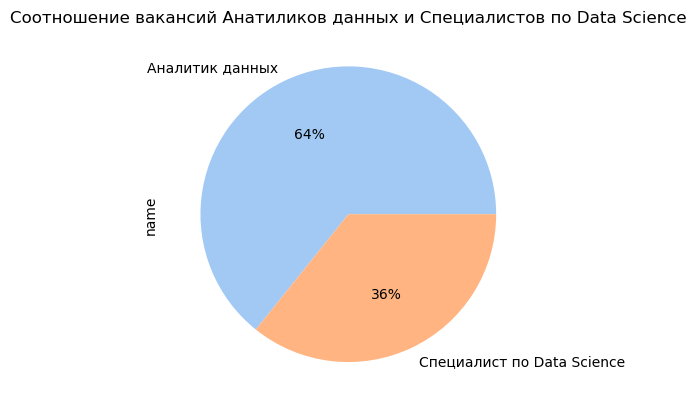

In [33]:
# Рассмотрим на диаграмме соотношение вакансий Аналитика и Data Science
chain_cat = vacancies.groupby ('category')['name'].count()
# Строим круговую диаграмму
colors = sns.color_palette('pastel')[ 0:5 ]
chain_cat.plot (kind='pie', labels = ['Аналитик данных', 'Специалист по Data Science'], colors = colors, autopct='%.0f%%')
plt.title('Соотношение вакансий Анатиликов данных и Специалистов по Data Science');

По диаграмме видно, что вакансий Аналитика данных больше - 64%, Специалист DS - 36%.

**3.2 Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалист по Data Science.**

In [34]:
# Посчитаем количество вакансий для каждой категории и отсортируем по убыванию
category_exp = vacancies.groupby('experience')['category'].count().sort_values(ascending = False) 
display (category_exp)

experience
Junior+ (1-3 years)      1496
Middle (3-6 years)        996
Junior (no experince)     185
Senior (6+ years)          44
Name: category, dtype: int64

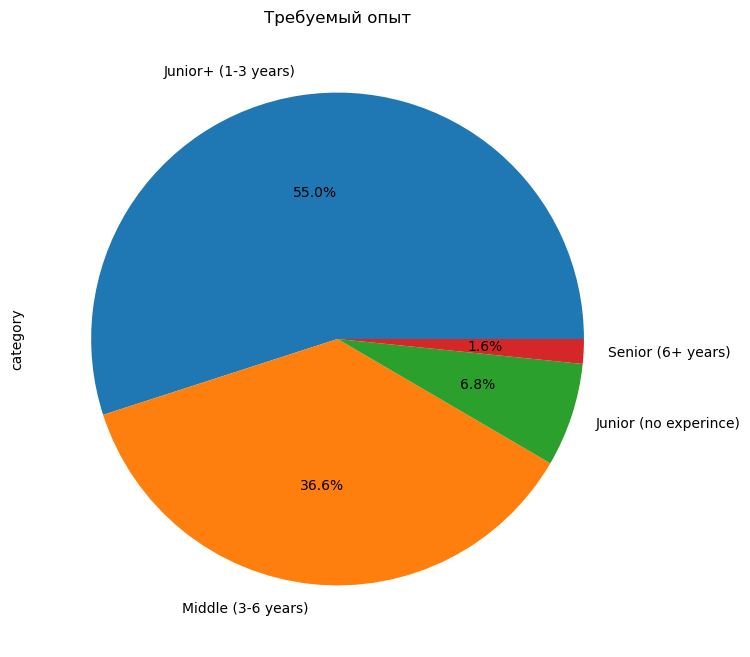

In [35]:
# Построим круговую диаграмму и отразим долю по требуемому оптыту от общего числа:
category_exp.plot (kind='pie', figsize = (10,8), autopct='%1.1f%%')
plt.title('Требуемый опыт');

Из полученных данных мы видим, что чаще требуются junior+ (55%) и middle(36,36%), мало вакансий без опыта, senior всего 1,6%

In [36]:
#Создадим переменную с данными по категории Специалист по Data Science
v_ds = vacancies[vacancies['category'] == 'Специалист по Data Science']
#Создадим переменную с данными по категории Аналитик данных
v_da = vacancies[vacancies['category'] == 'Аналитик данных']

In [37]:
# Посчитаем количество вакансий для каждой категории Специалист по Data Science и отсортируем по убыванию
v_ds = vacancies[vacancies['category'] == 'Специалист по Data Science']
category_exp_v_ds = v_ds.groupby('experience')['name'].count().sort_values(ascending = False) 
display (category_exp_v_ds)

experience
Middle (3-6 years)       464
Junior+ (1-3 years)      433
Junior (no experince)     44
Senior (6+ years)         32
Name: name, dtype: int64

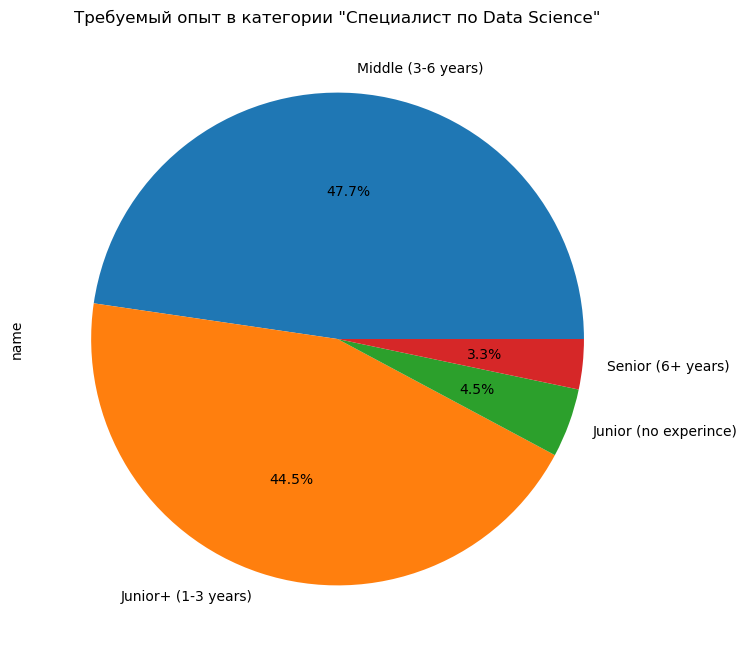

In [38]:
category_exp_v_ds.plot (kind='pie', figsize = (10,8), autopct='%1.1f%%')
plt.title('Требуемый опыт в категории "Специалист по Data Science"');

Среди Data Scientist другая картина больше всего требуются middle  (47,7%) , далее junior+ (44,5%), без опыта 4,5%, senior 3,3%

In [39]:
# Посчитаем количество вакансий для каждой категории Аналитик данных и отсортируем по убыванию
v_da = vacancies[vacancies['category'] == 'Аналитик данных']
category_exp_v_da = v_da.groupby('experience')['name'].count().sort_values(ascending = False) 
display (category_exp_v_da)

experience
Junior+ (1-3 years)      1063
Middle (3-6 years)        532
Junior (no experince)     141
Senior (6+ years)          12
Name: name, dtype: int64

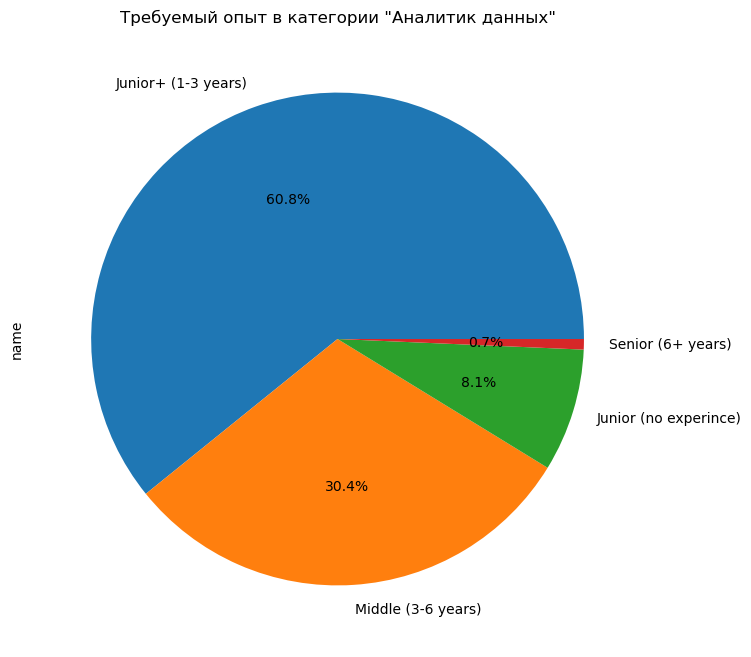

In [40]:
category_exp_v_da.plot (kind='pie', figsize = (10,8), autopct='%1.1f%%')
plt.title('Требуемый опыт в категории "Аналитик данных"');

У Аналитиков данных  больше всего требуются junior+ (60,8%)  и middle (30,4%), без опыта 8,1%, senior всего 0,7% <br>
При сравнении категорий можно обратить внимание, что новичку без опыта проще найти вакансию в аналитике данных, junior+ так же может найти больше вакансий в аналитике. А вот для senior вакансий больше в Data Science.

**3.3. Определение типичного места работы для Аналитика данных и Специалиста по Data Science по следующим параметрам: ТОП-работодателей по числу вакансий, зарплата, тип занятости, график работы (для Junior, Junior+, Middle, Senior)**

**3.3.1. ТОП-работодателей**

In [41]:
# Найдем топ-5 работодателей по числу вакансий
top_5 = vacancies.groupby('employer')['name'].count().sort_values( ascending = False).head(5)
top_5.columns = ['count', 'employer']
top_5

employer
СБЕР              435
Ozon               70
WILDBERRIES        59
Банк ВТБ (ПАО)     46
Т1                 44
Name: name, dtype: int64

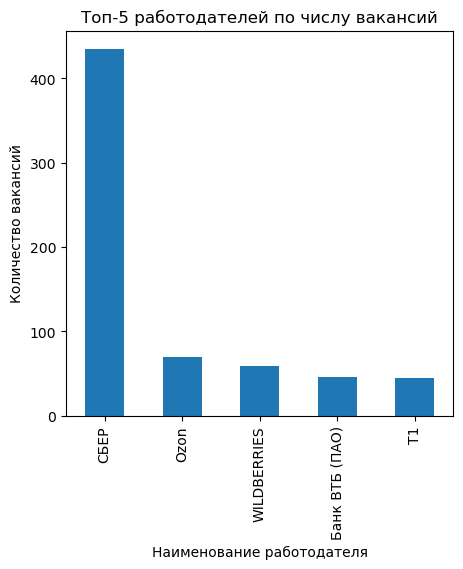

In [42]:
#Создаем диаграмму по полученным данным
top_5.plot (kind = 'bar', figsize = (5,5),  y = 'count', legend = False)
plt.title ('Топ-5 работодателей по числу вакансий')
plt.xlabel('Наименование работодателя')
plt.ylabel('Количество вакансий');

In [43]:
# Найдем топ-5 работодателей по числу вакансий для Аналитика данных
top_5_da = v_da.groupby('employer')['name'].count().sort_values( ascending = False).head(5)
top_5_da.columns = ['count', 'employer']
top_5_da

employer
СБЕР              237
WILDBERRIES        43
Ozon               34
Банк ВТБ (ПАО)     28
Т1                 25
Name: name, dtype: int64

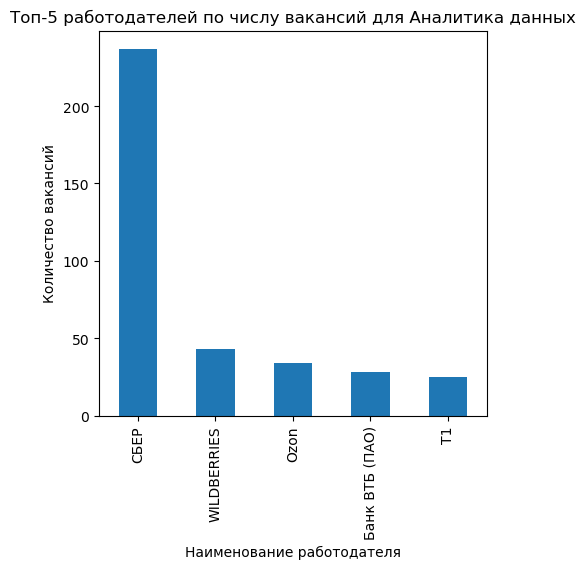

In [44]:
#Создаем диаграмму по полученным данным
top_5_da.plot (kind = 'bar', figsize = (5,5),  y = 'count', legend = False)
plt.title ('Топ-5 работодателей по числу вакансий для Аналитика данных')
plt.xlabel('Наименование работодателя')
plt.ylabel('Количество вакансий');

In [45]:
# Найдем топ-5 работодателей по числу вакансий для Data Scientist
top_5_v_ds = v_ds.groupby('employer')['name'].count().sort_values( ascending = False).head(5)
top_5_v_ds.columns = ['count', 'employer']
top_5_v_ds

employer
СБЕР            198
Ozon             36
Газпромбанк      24
Samokat.tech     20
Т1               19
Name: name, dtype: int64

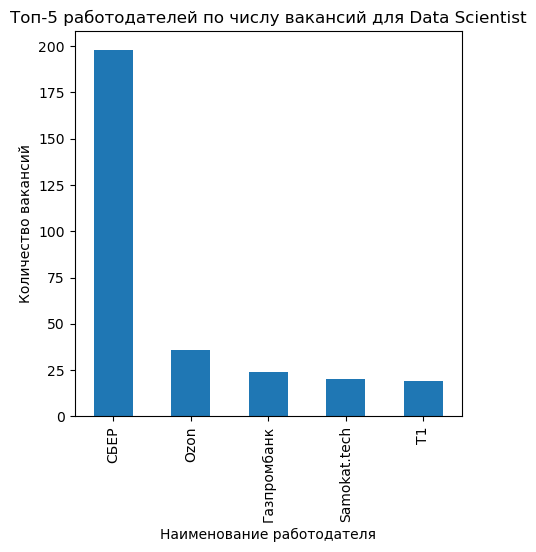

In [46]:
#Создаем диаграмму по полученным данным
top_5_v_ds.plot (kind = 'bar', figsize = (5,5),  y = 'count', legend = False)
plt.title ('Топ-5 работодателей по числу вакансий для Data Scientist')
plt.xlabel('Наименование работодателя')
plt.ylabel('Количество вакансий');

По полученным данным мы видим, что все Топ-5 предлагают большое количество вакансий для аналитиков. У Data Scientist другой Топ работадателей.

**3.3.2. Заработная плата**

In [47]:
#Группируем данные по заработной плате и Грейдам
category_salary_bin = vacancies.groupby(['experience', 'salary_bin'])['name'].count().reset_index()
category_salary_bin.columns = ['experience', 'salary_bin', 'count']
category_salary_bin['salary_bin'] = category_salary_bin['salary_bin'].astype(object)
category_salary_bin = category_salary_bin.sort_values(['count', 'salary_bin'])
category_salary_bin

experience                 salary_bin  count
15      Senior (6+ years)  От 100 тысяч до 200 тысяч      1
13      Senior (6+ years)           Больше 300 тысяч      2
16      Senior (6+ years)  От 200 тысяч до 300 тысяч      2
10     Middle (3-6 years)           Меньше 100 тысяч      4
2   Junior (no experince)  От 100 тысяч до 200 тысяч      6
3     Junior+ (1-3 years)           Больше 300 тысяч     19
12     Middle (3-6 years)  От 200 тысяч до 300 тысяч     19
11     Middle (3-6 years)  От 100 тысяч до 200 тысяч     22
7     Junior+ (1-3 years)  От 200 тысяч до 300 тысяч     31
1   Junior (no experince)           Меньше 100 тысяч     32
5     Junior+ (1-3 years)           Меньше 100 тысяч     38
14      Senior (6+ years)              ЗП не указана     39
8      Middle (3-6 years)           Больше 300 тысяч     46
6     Junior+ (1-3 years)  От 100 тысяч до 200 тысяч     79
0   Junior (no experince)              ЗП не указана    147
9      Middle (3-6 years)              ЗП не указана    905
4     Junior+ (1-3 years)              ЗП не указана   1329

Исключим вакансии где ЗП не указана

In [48]:
#Группируем данные по заработной плате и Грейдам
category_salary_bin = vacancies.groupby(['experience', 'salary_bin'])['name'].count().reset_index()
category_salary_bin.columns = ['experience', 'salary_bin', 'count']
category_salary_bin = category_salary_bin.query('salary_bin != "ЗП не указана"')
category_salary_bin['salary_bin'] = category_salary_bin['salary_bin'].astype(object)
category_salary_bin = category_salary_bin.sort_values(['count', 'salary_bin'])
category_salary_bin

experience                 salary_bin  count
15      Senior (6+ years)  От 100 тысяч до 200 тысяч      1
13      Senior (6+ years)           Больше 300 тысяч      2
16      Senior (6+ years)  От 200 тысяч до 300 тысяч      2
10     Middle (3-6 years)           Меньше 100 тысяч      4
2   Junior (no experince)  От 100 тысяч до 200 тысяч      6
3     Junior+ (1-3 years)           Больше 300 тысяч     19
12     Middle (3-6 years)  От 200 тысяч до 300 тысяч     19
11     Middle (3-6 years)  От 100 тысяч до 200 тысяч     22
7     Junior+ (1-3 years)  От 200 тысяч до 300 тысяч     31
1   Junior (no experince)           Меньше 100 тысяч     32
5     Junior+ (1-3 years)           Меньше 100 тысяч     38
8      Middle (3-6 years)           Больше 300 тысяч     46
6     Junior+ (1-3 years)  От 100 тысяч до 200 тысяч     79

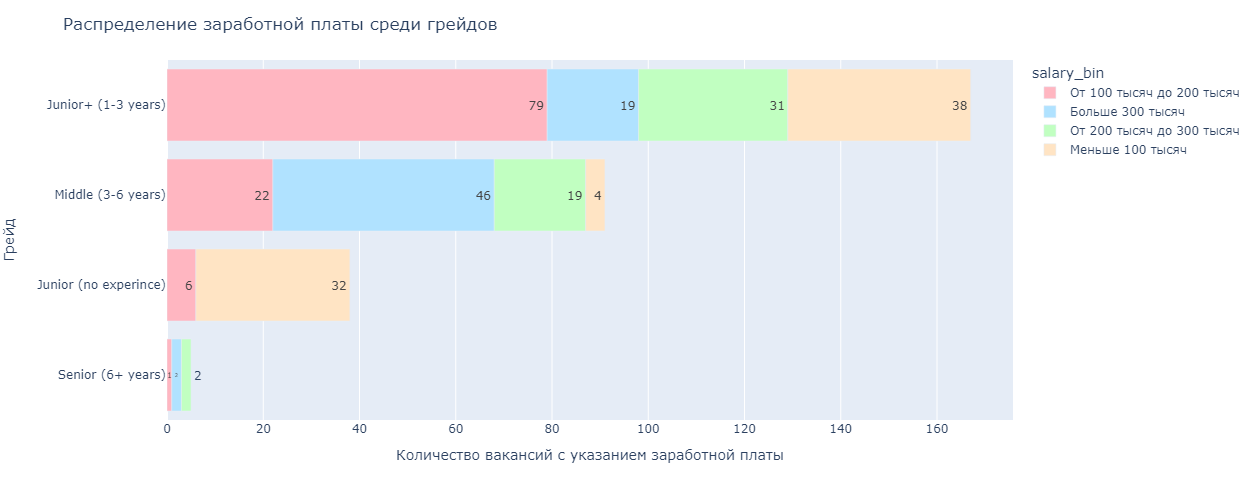

In [49]:
#Строим график salary_bin
fig = px.bar(category_salary_bin, x='count', y='experience', text= 'count', color='salary_bin',  
             color_discrete_sequence=['#FFB6C1', '#B0E2FF', '#C1FFC1', '#FFE4C4'],
             height=500,
             width=1200
             )
fig.update_layout(title = 'Распределение заработной платы среди грейдов',
                  xaxis_title = 'Количество вакансий с указанием заработной платы',
                  yaxis_title = 'Грейд')
fig.show()

Большая часть вакансий без указания ЗП, для анализа мы их исключили. По полученному графику можно увидеть, что чаще указана для junior+, большинство вакансий с доходом от 100 тыс. руб., редко указывают у senior, предполагаю что сеньорам предлагают ЗП индивидуально на основании имеющегося опыта.

In [50]:
#Группируем данные по заработной плате и Грейдам для Аналитика данных
category_salary_bin = v_da.groupby(['experience', 'salary_bin'])['name'].count().reset_index()
category_salary_bin.columns = ['experience', 'salary_bin', 'count']
category_salary_bin = category_salary_bin.query('salary_bin != "ЗП не указана"')
category_salary_bin['salary_bin'] = category_salary_bin['salary_bin'].astype(object)
category_salary_bin = category_salary_bin.sort_values(['count', 'salary_bin'])
category_salary_bin

experience                 salary_bin  count
3     Junior+ (1-3 years)           Больше 300 тысяч      2
14      Senior (6+ years)  От 200 тысяч до 300 тысяч      2
10     Middle (3-6 years)           Меньше 100 тысяч      4
2   Junior (no experince)  От 100 тысяч до 200 тысяч      5
12     Middle (3-6 years)  От 200 тысяч до 300 тысяч      9
11     Middle (3-6 years)  От 100 тысяч до 200 тысяч     18
7     Junior+ (1-3 years)  От 200 тысяч до 300 тысяч     21
8      Middle (3-6 years)           Больше 300 тысяч     24
1   Junior (no experince)           Меньше 100 тысяч     29
5     Junior+ (1-3 years)           Меньше 100 тысяч     33
6     Junior+ (1-3 years)  От 100 тысяч до 200 тысяч     72

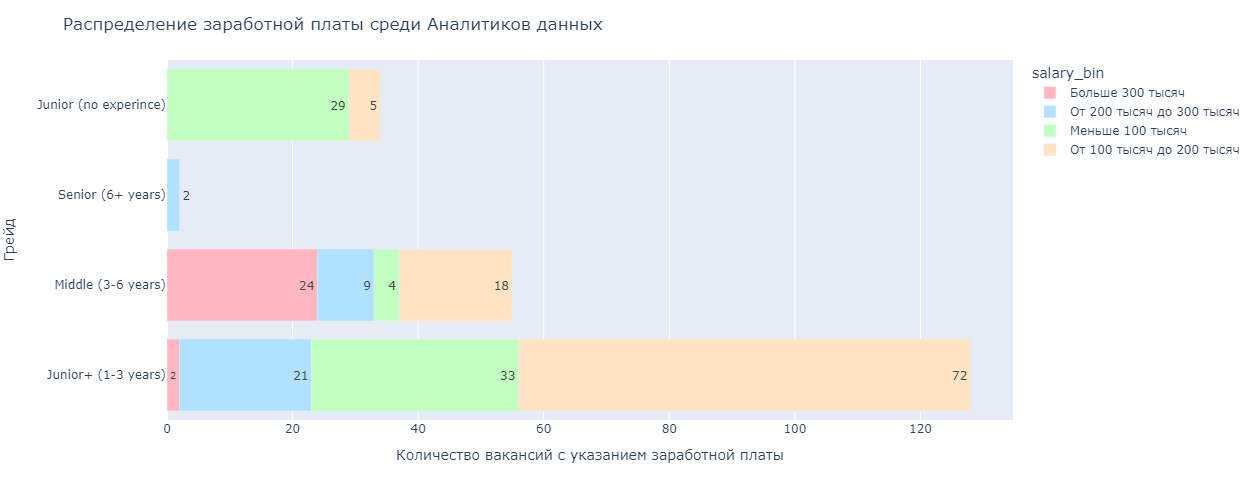

In [51]:
#Строим график по распределению salary_bin для Аналитика данных
fig = px.bar(category_salary_bin, x='count', y='experience', text= 'count', color='salary_bin',           
             color_discrete_sequence=['#FFB6C1', '#B0E2FF', '#C1FFC1', '#FFE4C4'],
             height=500,
             width=1200
             )
fig.update_layout(title = 'Распределение заработной платы среди Аналитиков данных',
                  xaxis_title = 'Количество вакансий с указанием заработной платы',
                  yaxis_title = 'Грейд')
fig.show()

По полученному графику мы видим, что вилка ЗП у junior+ разнообразная, juniorу без опыта не предлагают ЗП выше 200 тыс., seniorу не предлагают ЗП ниже 200 тыс.

In [52]:
#Группируем данные по заработной плате и Грейдам для DS
category_salary_bin = v_ds.groupby(['experience', 'salary_bin'])['name'].count().reset_index()
category_salary_bin.columns = ['experience', 'salary_bin', 'count']
category_salary_bin = category_salary_bin.query('salary_bin != "ЗП не указана"')
category_salary_bin['salary_bin'] = category_salary_bin['salary_bin'].astype(object)
category_salary_bin = category_salary_bin.sort_values(['count', 'salary_bin'])
category_salary_bin

experience                 salary_bin  count
2   Junior (no experince)  От 100 тысяч до 200 тысяч      1
14      Senior (6+ years)  От 100 тысяч до 200 тысяч      1
12      Senior (6+ years)           Больше 300 тысяч      2
1   Junior (no experince)           Меньше 100 тысяч      3
10     Middle (3-6 years)  От 100 тысяч до 200 тысяч      4
5     Junior+ (1-3 years)           Меньше 100 тысяч      5
6     Junior+ (1-3 years)  От 100 тысяч до 200 тысяч      7
7     Junior+ (1-3 years)  От 200 тысяч до 300 тысяч     10
11     Middle (3-6 years)  От 200 тысяч до 300 тысяч     10
3     Junior+ (1-3 years)           Больше 300 тысяч     17
8      Middle (3-6 years)           Больше 300 тысяч     22

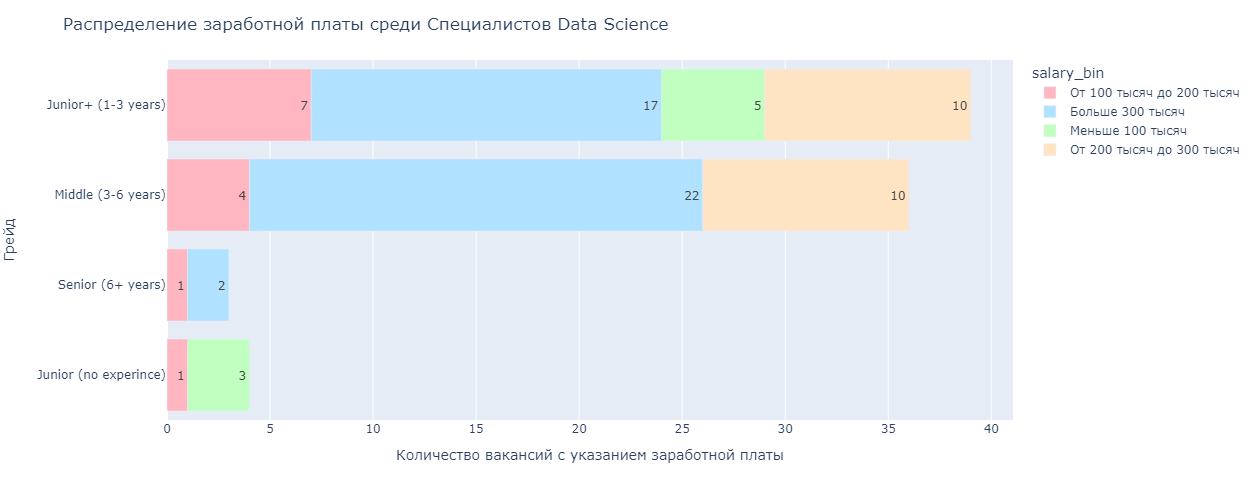

In [53]:
#Строим график по распределению salary_bin для DS
fig = px.bar(category_salary_bin, x='count', y='experience', text= 'count', color='salary_bin',
             color_discrete_sequence=['#FFB6C1', '#B0E2FF', '#C1FFC1', '#FFE4C4'],
             height=500,
             width=1200
             )
fig.update_layout(title = 'Распределение заработной платы среди Специалистов Data Science',
                  xaxis_title = 'Количество вакансий с указанием заработной платы',
                  yaxis_title = 'Грейд')
fig.show()

По полученному графику мы видим, junior без опыта так же не предлагают ЗП выше 200 тыс.

**3.3.3. Тип занятости**

In [54]:
#Группируем данные по типу занятости
employment_v= vacancies.groupby('employment')['name'].count().sort_values( ascending = False)
employment_v.columns = ['count', 'employment']
employment_v

employment
Полная занятость       2653
Стажировка               35
Частичная занятость      23
Проектная работа         10
Name: name, dtype: int64

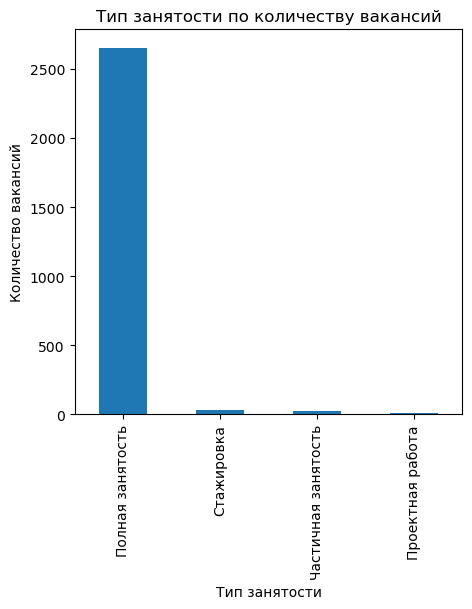

In [55]:
#Создаем диаграмму по полученным данным
employment_v.plot (kind = 'bar', figsize = (5,5),  y = 'count', legend = False)
plt.title ('Тип занятости по количеству вакансий')
plt.xlabel('Тип занятости')
plt.ylabel('Количество вакансий');

По графику видно, что почти все вакансии предлагают полную занятость - 2653. Смотреть отдельно Аналитика данных и Data Scientist нет смысла.

**3.3.4. График работы**

In [56]:
#Группируем данные по графику работы
schedule_v= vacancies.groupby('schedule')['name'].count().sort_values( ascending = False)
schedule_v.columns = ['count', 'schedule']
schedule_v

schedule
Полный день         2116
Удаленная работа     511
Гибкий график         80
Сменный график        14
Name: name, dtype: int64

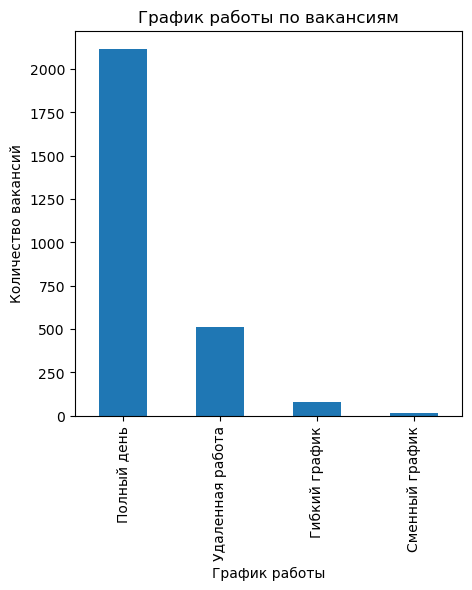

In [57]:
#Создаем диаграмму по полученным данным
schedule_v.plot (kind = 'bar', figsize = (5,5),  y = 'count', legend = False)
plt.title ('График работы по вакансиям')
plt.xlabel('График работы')
plt.ylabel('Количество вакансий');

Большинство вакансий предлагают Полный день - 2116, так же много вакансий с удаленным форматом работы - 511. 

In [58]:
#Рассмотрим отдельно каждую категорию
#Группируем данные по аналитикам:
schedule_v_da= v_da.groupby('schedule')['name'].count().sort_values( ascending = False)
schedule_v_da.columns = ['count', 'schedule']
schedule_v_da

schedule
Полный день         1394
Удаленная работа     308
Гибкий график         37
Сменный график         9
Name: name, dtype: int64

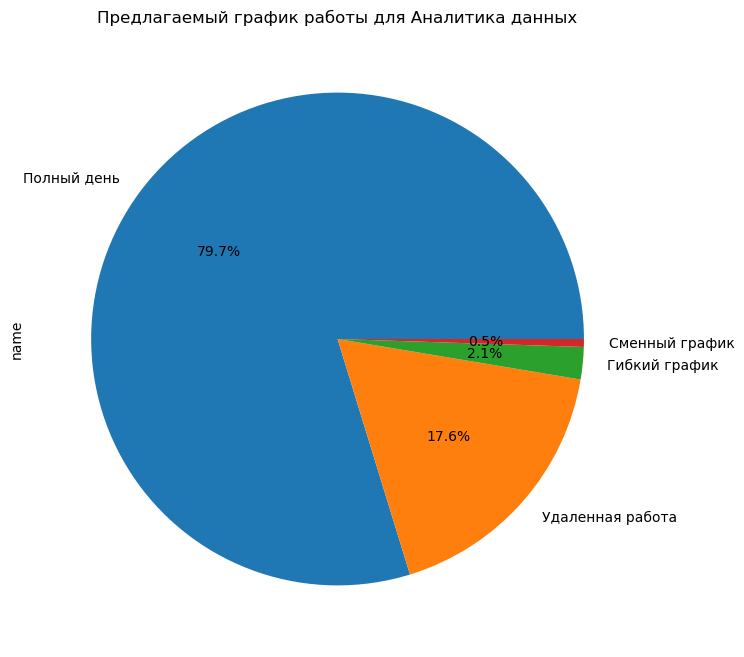

In [59]:
#Строим круговую диаграмму
schedule_v_da.plot (kind='pie', figsize = (10,8), autopct='%1.1f%%')
plt.title('Предлагаемый график работы для Аналитика данных');

In [60]:
#Группируем данные по DS:
schedule_v_ds= v_ds.groupby('schedule')['name'].count().sort_values( ascending = False)
schedule_v_ds.columns = ['count', 'schedule']
schedule_v_ds

schedule
Полный день         722
Удаленная работа    203
Гибкий график        43
Сменный график        5
Name: name, dtype: int64

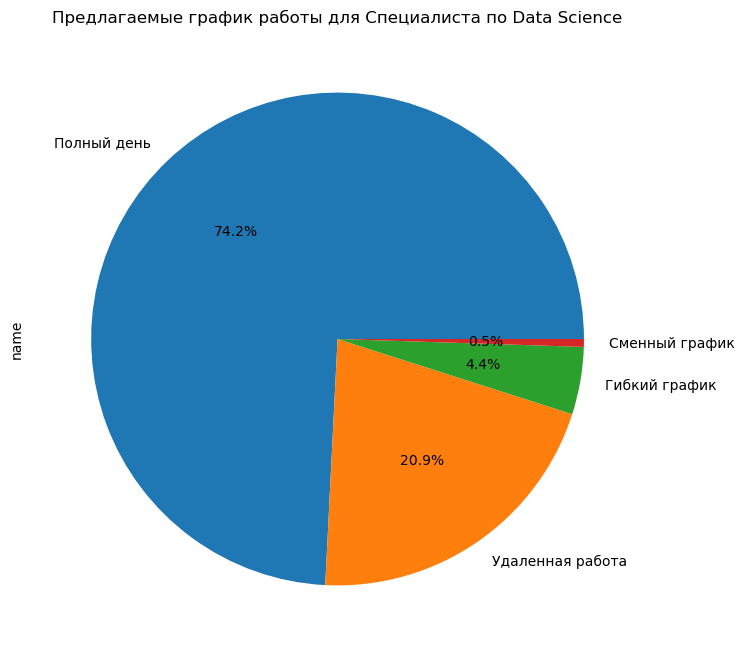

In [61]:
#Строим круговую диаграмму
schedule_v_ds.plot (kind='pie', figsize = (10,8), autopct='%1.1f%%')
plt.title('Предлагаемые график работы для Специалиста по Data Science');

График работы примерно одинаковый, больше всего вакансий с предложением на полный день.

**3.3.5. ТОП-городов**

In [62]:
#Группируем данные по городам
area_v= vacancies.groupby('area')['name'].count().sort_values( ascending = False)
area_v.columns = ['count', 'area']
area_v

area
Москва                           1975
Санкт-Петербург                   264
Екатеринбург                       68
Новосибирск                        56
Нижний Новгород                    50
                                 ... 
Алтайское                           1
Одинцово                            1
Оренбург                            1
Подольск (Московская область)       1
Ярославль                           1
Name: name, Length: 74, dtype: int64

In [63]:
#Создаем таблицу Топ-10 городов
area_v_top10 = vacancies.groupby(['area'])['name'].count().sort_values( ascending = False).head(10).reset_index()
area_v_top10.columns = ['area', 'count']
area_v_top10

area  count
0           Москва   1975
1  Санкт-Петербург    264
2     Екатеринбург     68
3      Новосибирск     56
4  Нижний Новгород     50
5           Казань     40
6      Владивосток     31
7        Краснодар     27
8           Самара     16
9   Ростов-на-Дону     12

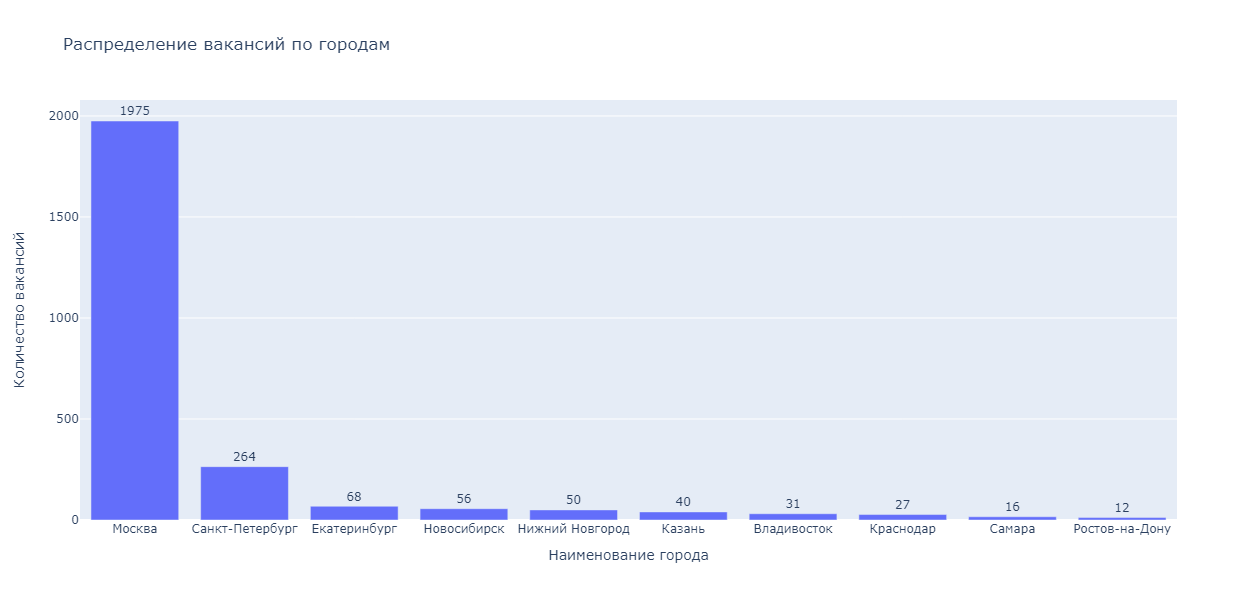

In [64]:
#Строим график
fig = px.bar(area_v_top10,
             x='area',
             y='count',
             text = 'count',
             title = 'Распределение вакансий по городам'
             )
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis_title='Наименование города',
                  yaxis_title='Количество вакансий',
                  yaxis={'categoryorder':'total descending'},
                  height=600 
                 )
fig.show()

По графику видно, что больше всего вакансий предалагает Москва - 1 975, далее Санкт-Петербург - 264, остальные города менее 70.

**4. Навыки hard skills («твердые») и soft skills («мягкие»).**

**4.1. Какие навыки спрашивают чаще?**

In [65]:
#Рассмотрим "твердые" навыки
vacancies.hard_skills_from_description.value_counts()

Pandas                                552
confluence                            128
Юнит-экономика                         80
Pandas, confluence                     58
Pandas, Юнит-экономика                 15
Pandas, confluence, Юнит-экономика      3
Google Sheets                           2
Pandas, Google Sheets                   1
Математическая статистика               1
confluence, Юнит-экономика              1
Name: hard_skills_from_description, dtype: int64

In [66]:
#Рассмотрим очищенные "твердые" навыки, очистим данные от запятых и пробелов
vacancies.hard_skills_from_description.str.split(',').explode().str.strip().str.lower().value_counts()[:20]

pandas                       629
confluence                   190
юнит-экономика                99
google sheets                  3
математическая статистика      1
Name: hard_skills_from_description, dtype: int64

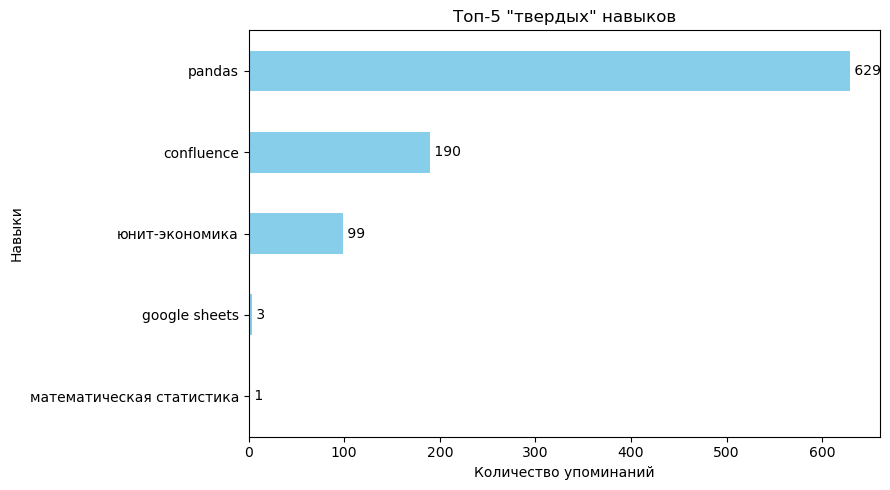

In [67]:
#Построим график по hard_skills
h_skill_counts = vacancies.hard_skills_from_description.str.split(',').explode().str.strip().str.lower().value_counts()[:20]

plt.figure(figsize=(9, 5))
h_skill_y = h_skill_counts.sort_values().plot(kind='barh', color='skyblue')

plt.xlabel('Количество упоминаний')
plt.ylabel('Навыки')
plt.title('Топ-5 "твердых" навыков')
for h_skill in h_skill_y.patches:
    plt.text(
        h_skill.get_width(),       
        h_skill.get_y() + h_skill.get_height() / 2,  
        f' {h_skill.get_width()}', 
        va='center'           
    )

plt.tight_layout()
plt.show()

На основании полученные данных, чаще всего из "Твердных" навыков требование к кандитатам - это pandas и confluence

In [68]:
#Рассмотрим "мягкие" навыки
vacancies.soft_skills_from_description.value_counts()

Документация                                                                       340
Коммуникация                                                                       187
Аналитическое мышление                                                             118
Коммуникация, Документация                                                          45
Проактивность                                                                       42
Документация, Аналитическое мышление                                                19
Коммуникация, Аналитическое мышление                                                10
Креативность                                                                        10
Коммуникация, Проактивность                                                          8
Проактивность, Аналитическое мышление                                                7
Креативность, Аналитическое мышление                                                 6
Коммуникация, Документация, Аналитическое м

In [69]:
#Рассмотрим очищенные "мягкие" навыки, очистим данные от запятых и пробелов
vacancies.soft_skills_from_description.str.split(',').explode().str.strip().str.lower().value_counts()[:20]

документация               433
коммуникация               286
аналитическое мышление     171
проактивность               66
креативность                26
переговоры                  16
адаптивность                12
принятие решений            12
презентация результатов     10
внимание к деталям           7
решение проблем              7
работа в команде             4
лидерство                    4
критическое мышление         3
тайм-менеджмент              3
письменная коммуникация      2
эмпатия                      1
Name: soft_skills_from_description, dtype: int64

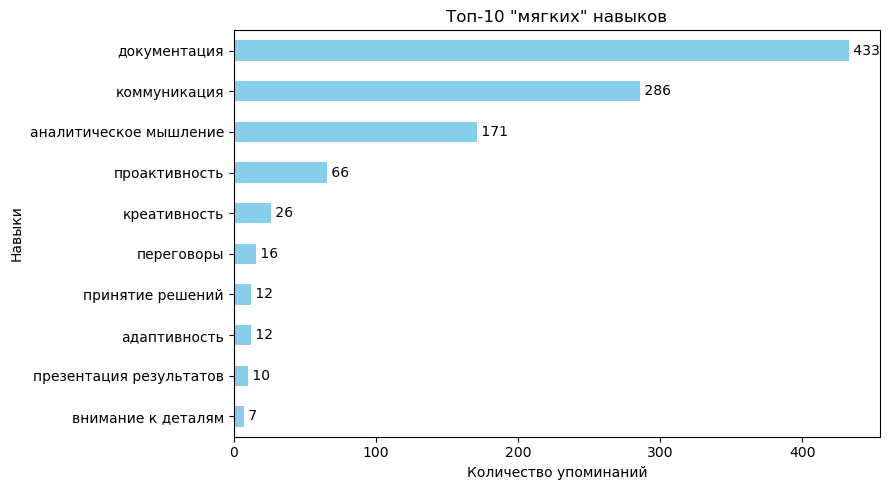

In [70]:
#Построим график по soft_skills
s_skill_counts = vacancies.soft_skills_from_description.str.split(',').explode().str.strip().str.lower().value_counts()[:10]

plt.figure(figsize=(9, 5))
s_skill_y = s_skill_counts.sort_values().plot(kind='barh', color='skyblue')

plt.xlabel('Количество упоминаний')
plt.ylabel('Навыки')
plt.title('Топ-10 "мягких" навыков')
for s_skill in s_skill_y.patches:
    plt.text(
        s_skill.get_width(),      
        s_skill.get_y() + s_skill.get_height() / 2,  
        f' {s_skill.get_width()}', 
        va='center'            
    )

plt.tight_layout()
plt.show()

На основании полученные данных, чаще всего из "мягких" навыков требование к кандитатам - это документация, коммуникация и аналитическое мышление

**4.2. К какому грейду и к какой специальности требований больше?**

In [71]:
#Группируем данные для hard_skills
skills_data = vacancies.groupby(['experience', 'category']).agg({
    'hard_skills_from_description': 'count',
    
}).reset_index()

# Подготоваливаем данные для тепловой карты
pivot_table = skills_data.pivot('experience', 'category', 'hard_skills_from_description')

# Создание тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Тепловая карта требований твердых навыков по грейдам опыта и специальностям')
plt.xlabel('Специальности')
plt.ylabel('Грейды опыта')
plt.show()

C:\Users\85fm\AppData\Local\Temp\ipykernel_78488\643498211.py:8: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



На основании полученной тепловой карты, больше всего требований к junior+, как у Аналитика данных, так и у Специалиста DS

In [72]:
#Группируем данные для soft_skills
skills_data1 = vacancies.groupby(['experience', 'category']).agg({
    'soft_skills_from_description': 'count',
    
}).reset_index()

# Подготоваливаем данные для тепловой карты
pivot_table = skills_data1.pivot('experience', 'category', 'soft_skills_from_description')

# Создание тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Тепловая карта требований мягких навыков по грейдам опыта и специальностям')
plt.xlabel('Специальности')
plt.ylabel('Грейды опыта')
plt.show()

C:\Users\85fm\AppData\Local\Temp\ipykernel_78488\2081911527.py:8: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



На основании полученной тепловой карты, "мягкие" навыки требуются больше всего у junior+ (Аналитик данных), далее middle у обеих специальностях

**4.3. Cамые важные hard-skils, самые важные soft-skils. Отдельно  по грейдам Junior, Junior+, Middle, Senior.**

In [73]:
print(vacancies['hard_skills_from_description'].isnull().sum())

1880


In [74]:
# Удаление строк с NaN значениями в столбце 'hard_skills_from_description'
vacancies = vacancies.dropna(subset=['hard_skills_from_description'])

# Продолжение преобразования значений столбца в строки
vacancies['hard_skills_from_description'] = vacancies['hard_skills_from_description'].astype(str)

# Разделение навыков и создание отдельной строки для каждого навыка
vacancies['hard_skills_from_description'] = vacancies['hard_skills_from_description'].str.split(',').apply(lambda x: [i.strip() for i in x])
vacancies_exploded_h = vacancies.explode('hard_skills_from_description')

# Группировка данных по навыкам и грейдам
category_hard_skills = vacancies_exploded_h.groupby(['experience', 'hard_skills_from_description'])['name'].count().reset_index()
category_hard_skills.columns = ['experience', 'hard_skills_from_description', 'count']
category_hard_skills = category_hard_skills.sort_values(['experience', 'count'], ascending=[True, False])

# Установка стиля Seaborn и создание столбчатой диаграммы
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="count", y="hard_skills_from_description", hue="experience", data=category_hard_skills)

# Добавление подписей к столбцам
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.1f'), 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2.), 
                ha = 'center', va = 'center', 
                xytext = (20, 0), textcoords = 'offset points')

# Настройка заголовков и меток
plt.xlabel('Количество вакансий')
plt.ylabel('Hard Skills')
plt.title('Распределение Hard Skills по уровням опыта')
plt.legend(title='Уровень опыта')

# Отображение графика
plt.show()

Из hard skills чаще требуется Pandas и confluence.

In [75]:
#Рассмотрим hard_skills отдельно для Аналитика данных
# Удаление строк с NaN значениями в столбце 'hard_skills_from_description'
v_da = v_da.dropna(subset=['hard_skills_from_description'])

# Продолжение преобразования значений столбца в строки
v_da['hard_skills_from_description'] = v_da['hard_skills_from_description'].astype(str)

# Разделение навыков и создание отдельной строки для каждого навыка
v_da['hard_skills_from_description'] = v_da['hard_skills_from_description'].str.split(',').apply(lambda x: [i.strip() for i in x])
v_da_exploded_h = v_da.explode('hard_skills_from_description')

# Группировка данных по навыкам и грейдам
category_hard_skills_da = v_da_exploded_h.groupby(['experience', 'hard_skills_from_description'])['name'].count().reset_index()
category_hard_skills_da.columns = ['experience', 'hard_skills_from_description', 'count']
category_hard_skills_da = category_hard_skills_da.sort_values(['experience', 'count'], ascending=[True, False])

# Установка стиля Seaborn и создание столбчатой диаграммы
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="count", y="hard_skills_from_description", hue="experience", data=category_hard_skills_da)

# Добавление подписей к столбцам
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.1f'), 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2.), 
                ha = 'center', va = 'center', 
                xytext = (20, 0), textcoords = 'offset points')

# Настройка заголовков и меток
plt.xlabel('Количество вакансий')
plt.ylabel('Hard Skills')
plt.title('Распределение Hard Skills по уровням опыта среди Аналитиков данных')
plt.legend(title='Уровень опыта')

# Отображение графика
plt.show()

In [76]:
#Рассмотрим hard_skills отдельно для Cпецталиста DS
# Удаление строк с NaN значениями в столбце 'hard_skills_from_description'
v_ds = v_ds.dropna(subset=['hard_skills_from_description'])

# Продолжение преобразования значений столбца в строки
v_ds['hard_skills_from_description'] = v_ds['hard_skills_from_description'].astype(str)

# Разделение навыков и создание отдельной строки для каждого навыка
v_ds['hard_skills_from_description'] = v_ds['hard_skills_from_description'].str.split(',').apply(lambda x: [i.strip() for i in x])
v_ds_exploded_h = v_ds.explode('hard_skills_from_description')

# Группировка данных по навыкам и грейдам
category_hard_skills_ds = v_ds_exploded_h.groupby(['experience', 'hard_skills_from_description'])['name'].count().reset_index()
category_hard_skills_ds.columns = ['experience', 'hard_skills_from_description', 'count']
category_hard_skills_ds = category_hard_skills_ds.sort_values(['experience', 'count'], ascending=[True, False])

# Установка стиля Seaborn и создание столбчатой диаграммы
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="count", y="hard_skills_from_description", hue="experience", data=category_hard_skills_ds)

# Добавление подписей к столбцам
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.1f'), 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2.), 
                ha = 'center', va = 'center', 
                xytext = (20, 0), textcoords = 'offset points')

# Настройка заголовков и меток
plt.xlabel('Количество вакансий')
plt.ylabel('Hard Skills')
plt.title('Распределение Hard Skills по уровням опыта среди Cпециалистов DS')
plt.legend(title='Уровень опыта')

# Отображение графика
plt.show()

При сравнении Аналитиков данных и Специалистов DS можно сделать вывод - на обоих направлениях чаще требуются Pandas и confluence (у грейдов junor+ и middle.). У Аналитиков так же спрашивают Google Sheets и Математическую статистику. Юнит-Экономика чаще требуется у Специлаистов DS.

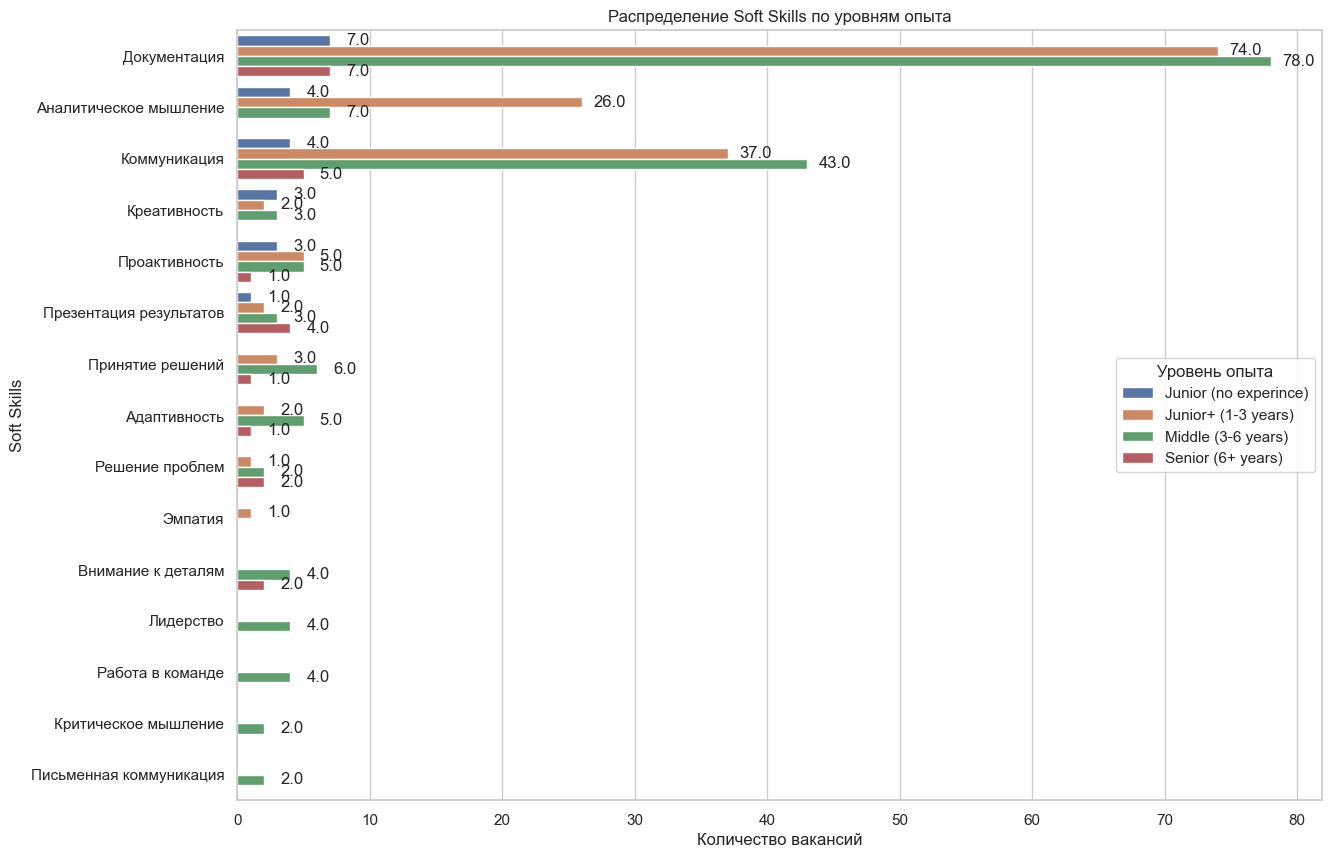

In [77]:
# Рассмотрим soft_skills
# Разделяем навыки в каждой строке и создаем отдельную строку для каждого навыка
vacancies['soft_skills_from_description'] = vacancies['soft_skills_from_description'].str.split(', ')
vacancies_exploded = vacancies.explode('soft_skills_from_description')

# Группируем данные по навыкам и грейдам
category_soft_skills = vacancies_exploded.groupby(['experience', 'soft_skills_from_description'])['name'].count().reset_index()
category_soft_skills.columns = ['experience', 'soft_skills_from_description', 'count']
category_soft_skills = category_soft_skills.sort_values(['experience', 'count'], ascending=[True, False])

# Установка стиля Seaborn для красивых графиков
sns.set(style="whitegrid")

# Создание столбчатой диаграммы
plt.figure(figsize=(14, 10))
ax = sns.barplot(x="count", y="soft_skills_from_description", hue="experience", data=category_soft_skills)

# Добавление подписей к столбцам
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.1f'), 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2.), 
                ha = 'center', va = 'center', 
                xytext = (20, 0), textcoords = 'offset points')

# Настройка заголовков и меток
plt.xlabel('Количество вакансий')
plt.ylabel('Soft Skills')
plt.title('Распределение Soft Skills по уровням опыта')
plt.legend(title='Уровень опыта')

# Отображение графика
plt.show()

Из Soft Skills чаще требуются - Документация, Аналитическое мышление, Коммуникация

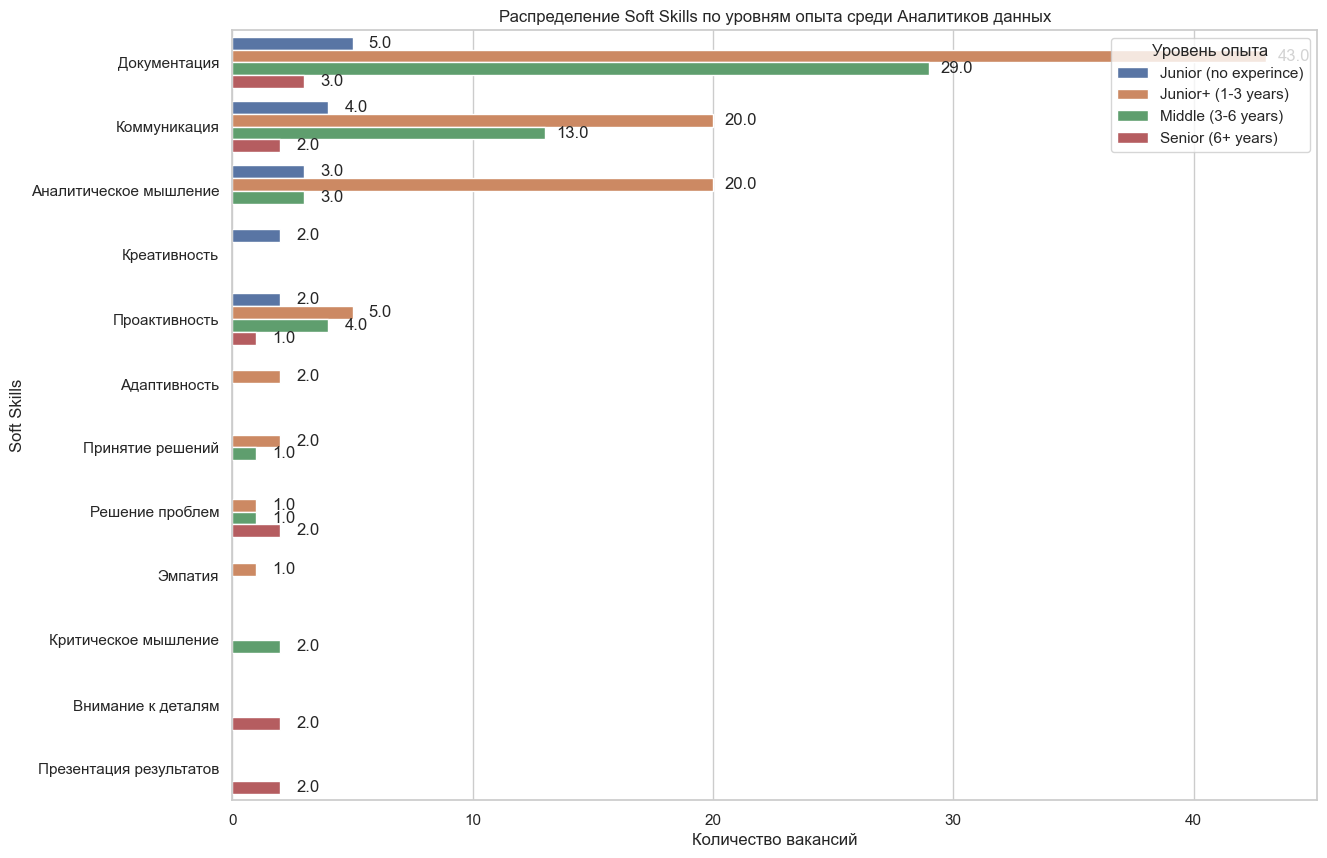

In [78]:
# Рассмотрим soft_skills отдельно для Аналитика данных
# Разделяем навыки в каждой строке и создаем отдельную строку для каждого навыка
v_da['soft_skills_from_description'] = v_da['soft_skills_from_description'].str.split(', ')
v_da_exploded = v_da.explode('soft_skills_from_description')

# Группируем данные по навыкам и грейдам
category_soft_skills_da = v_da_exploded.groupby(['experience', 'soft_skills_from_description'])['name'].count().reset_index()
category_soft_skills_da.columns = ['experience', 'soft_skills_from_description', 'count']
category_soft_skills_da = category_soft_skills_da.sort_values(['experience', 'count'], ascending=[True, False])

# Установка стиля Seaborn для красивых графиков
sns.set(style="whitegrid")

# Создание столбчатой диаграммы
plt.figure(figsize=(14, 10))
ax = sns.barplot(x="count", y="soft_skills_from_description", hue="experience", data=category_soft_skills_da)

# Добавление подписей к столбцам
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.1f'), 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2.), 
                ha = 'center', va = 'center', 
                xytext = (20, 0), textcoords = 'offset points')

# Настройка заголовков и меток
plt.xlabel('Количество вакансий')
plt.ylabel('Soft Skills')
plt.title('Распределение Soft Skills по уровням опыта среди Аналитиков данных')
plt.legend(title='Уровень опыта')

# Отображение графика
plt.show()

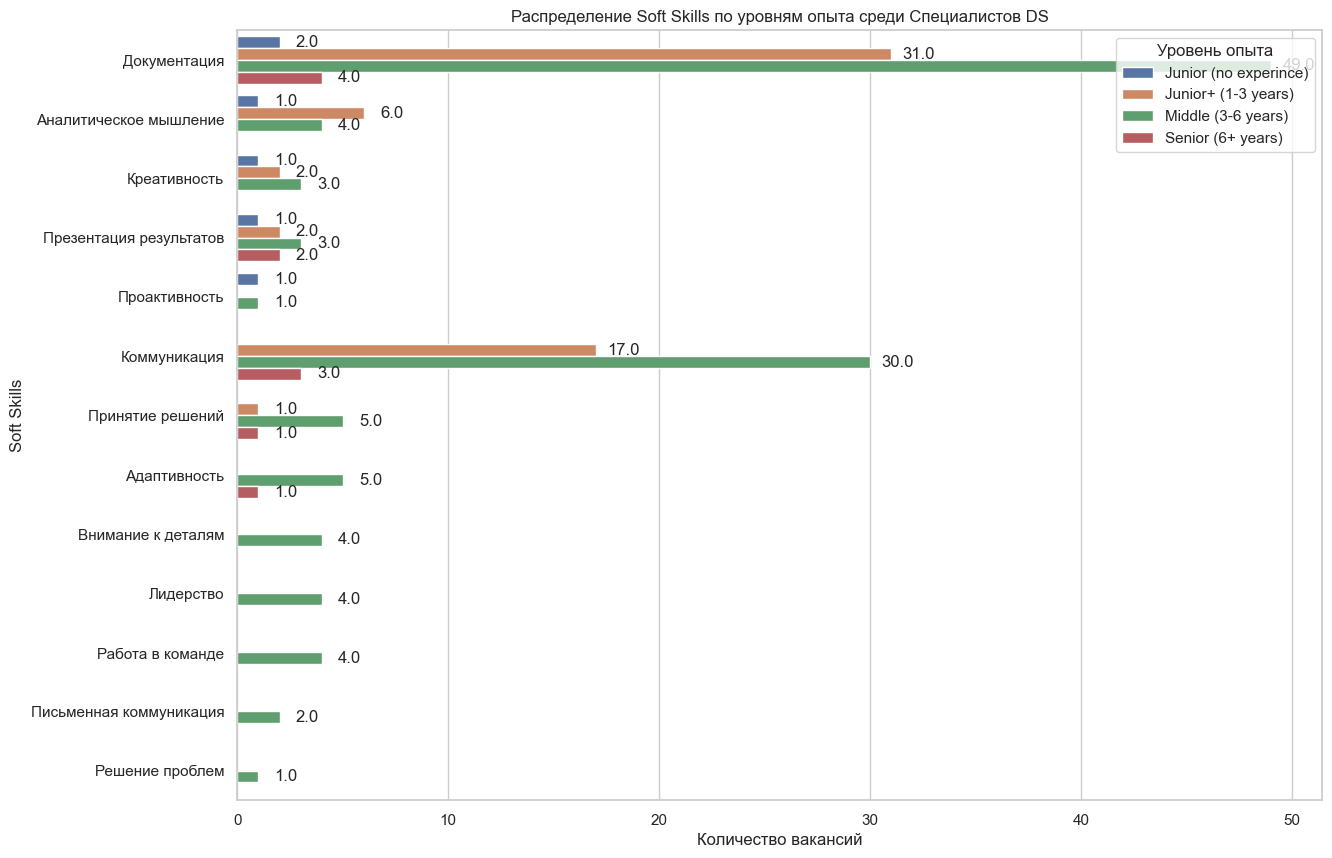

In [79]:
# Рассмотрим soft_skills отдельно для Специалиста DS
# Разделяем навыки в каждой строке и создаем отдельную строку для каждого навыка
v_ds['soft_skills_from_description'] = v_ds['soft_skills_from_description'].str.split(', ')
v_ds_exploded = v_ds.explode('soft_skills_from_description')

# Группируем данные по навыкам и грейдам
category_soft_skills_ds = v_ds_exploded.groupby(['experience', 'soft_skills_from_description'])['name'].count().reset_index()
category_soft_skills_ds.columns = ['experience', 'soft_skills_from_description', 'count']
category_soft_skills_ds = category_soft_skills_ds.sort_values(['experience', 'count'], ascending=[True, False])

# Установка стиля Seaborn для красивых графиков
sns.set(style="whitegrid")

# Создание столбчатой диаграммы
plt.figure(figsize=(14, 10))
ax = sns.barplot(x="count", y="soft_skills_from_description", hue="experience", data=category_soft_skills_ds)

# Добавление подписей к столбцам
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.1f'), 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2.), 
                ha = 'center', va = 'center', 
                xytext = (20, 0), textcoords = 'offset points')

# Настройка заголовков и меток
plt.xlabel('Количество вакансий')
plt.ylabel('Soft Skills')
plt.title('Распределение Soft Skills по уровням опыта среди Специалистов DS')
plt.legend(title='Уровень опыта')

# Отображение графика
plt.show()

При сравнении soft skills у Аналитика данных и Специалиста DS, в обоих направлениях требуется Документация, Аналитическое мышление и Коммуникация

**5. Расчет помесячной динамики количества вакансий для Аналитика данных и Специалиста по Data Science для грейдов Junior, Junior+, Middle, Senior.**

In [80]:
# Преобразование строки 'published_at' в формат datetime
vacancies['published_at'] = pd.to_datetime(vacancies['published_at'])

# Фильтрация данных по категориям
data_analyst_vacancies = vacancies[vacancies['category'] == 'Аналитик данных']
data_science_vacancies = vacancies[vacancies['category'] == 'Специалист по Data Science']

# Функция для расчета динамики по грейдам
def calculate_dynamics(vacancies_df):
    # Группировка по месяцам и грейдам
    dynamics = vacancies_df.groupby([vacancies_df['published_at'].dt.to_period('M'), 'experience']).size().unstack(fill_value=0)
    return dynamics

# Расчет динамики для Аналитика данных
data_analyst_dynamics = calculate_dynamics(data_analyst_vacancies)

# Расчет динамики для Бизнес-аналитика
data_science_vacancies = calculate_dynamics(data_science_vacancies)

# Вывод результатов
print("Динамика вакансий для Аналитика данных:")
print(data_analyst_dynamics)
print("\nДинамика вакансий для Специалиста по Data Science:")
print(data_science_vacancies)

Динамика вакансий для Аналитика данных:
experience    Junior (no experince)  Junior+ (1-3 years)  Middle (3-6 years)  \
published_at                                                                   
2024-02                           0                    0                   1   
2024-03                           1                   29                  21   
2024-04                           4                   65                  35   
2024-05                           9                   74                  51   
2024-06                           8                   56                  31   

experience    Senior (6+ years)  
published_at                     
2024-02                       0  
2024-03                       0  
2024-04                       1  
2024-05                       4  
2024-06                       2  

Динамика вакансий для Специалиста по Data Science:
experience    Junior (no experince)  Junior+ (1-3 years)  Middle (3-6 years)  \
published_at                 

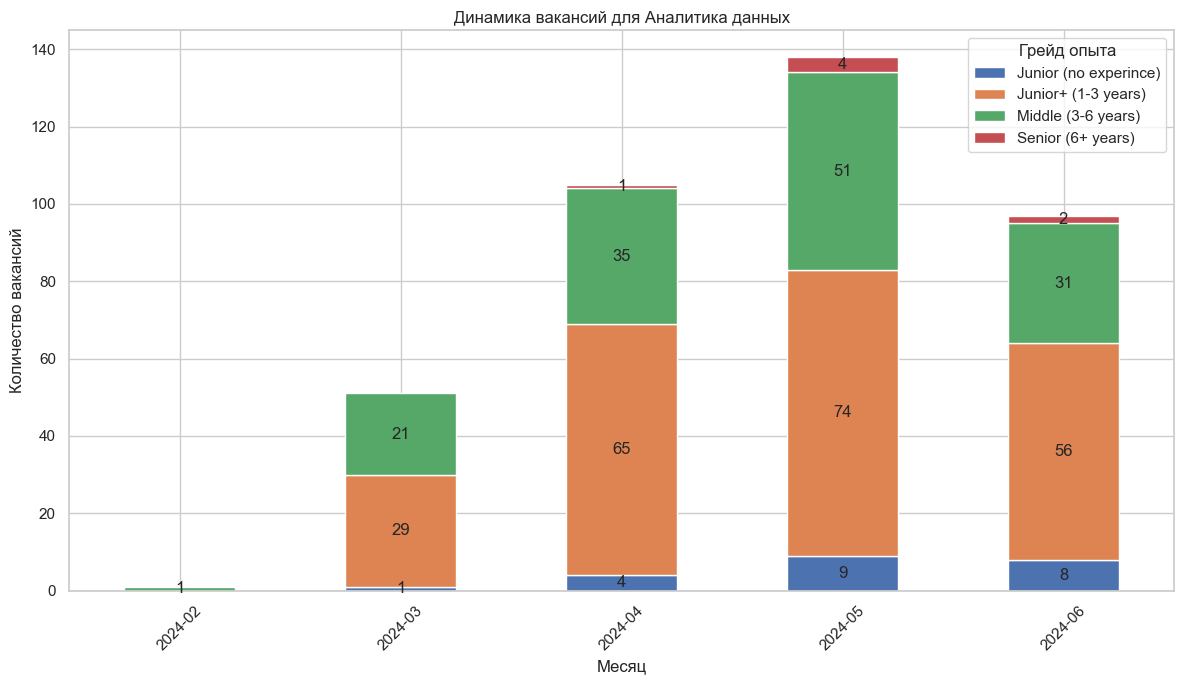

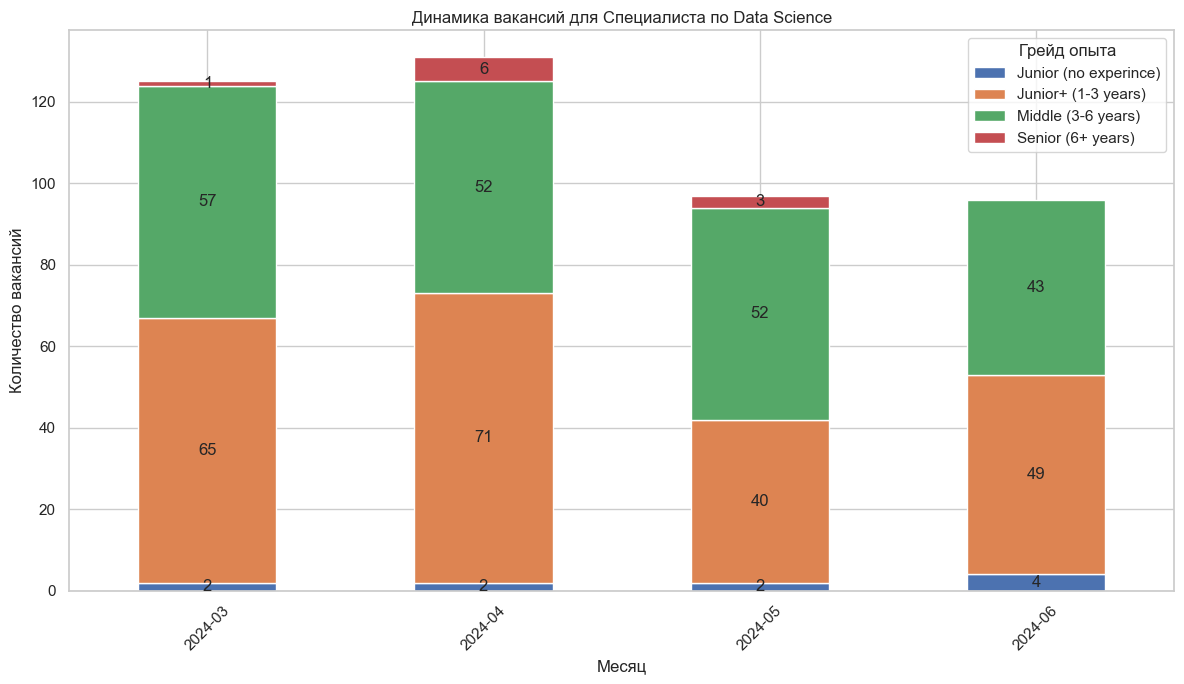

In [81]:
# Функция для отрисовки столбчатых диаграмм
def plot_dynamics(dynamics_df, title):
    # Создание фигуры и осей
    fig, ax = plt.subplots(figsize=(12, 7))
     # Определение постельных тонов
    
    # Построение столбчатых диаграмм для каждого грейда
    dynamics_df.plot(kind='bar', stacked=True, ax=ax)
    
    # Добавление подписей с цифрами
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + width / 2, p.get_y() + height / 2), 
                        ha='center', va='center')
    # Настройка подписей и заголовков
    ax.set_xlabel('Месяц')
    ax.set_ylabel('Количество вакансий')
    ax.set_title(title)
    ax.legend(title='Грейд опыта')
    
    # Отображение графика
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Визуализация для Аналитика данных
plot_dynamics(data_analyst_dynamics, 'Динамика вакансий для Аналитика данных')

# Визуализация для Специалиста Data Science
plot_dynamics(data_science_vacancies, 'Динамика вакансий для Специалиста по Data Science')

При сравнении графиков можно сделать следующие выводы:
1. в апреле чаще выкладывали вакансии для DS
2. в мае больше вакансий для аналитика данных
3. среди грейдов чаще требуются junior + и middle

**6. Формулирование выводов и рекомендаций.**

**Выводы:**

**Рынок труда:** Вакансий в области аналитики данных больше (64%), чем в сфере Data Science (36%).<br>
**Уровни опыта:** Вакансии для junior+ и middle специалистов составляют большинство на рынке, что указывает на высокий спрос на специалистов с начальным и средним уровнем опыта.<br>
**Возможности для новичков:** Новичкам без опыта проще найти работу в аналитике данных, в то время как для senior специалистов больше возможностей в Data Science.<br>
**Заработная плата:** Зарплаты чаще указывают для junior+ позиций, и большинство вакансий предлагают доход от 100 тыс. рублей.<br>
**География:** Топ города для вакансий - Москва и Санкт-Петербург.<br>
**Навыки:** Наиболее востребованными hard skills являются pandas и confluence, в то время как ключевыми soft skills являются документация и коммуникация.<br>

**Рекомендации:**

**Фокус на junior+ и middle:** Учитывая, что большинство вакансий приходится на эти категории, специалистам следует развивать навыки, соответствующие этим уровням.<br>
**Специализация для senior:** Senior специалистам стоит рассмотреть возможности в Data Science, где спрос на их опыт выше.<br>
**Обучение и развитие:** Всем специалистам следует постоянно обновлять свои знания и навыки, чтобы соответствовать требованиям рынка.<br>
**Географическое распределение:** Специалистам, ищущим работу, стоит учитывать, что большинство вакансий сосредоточено в крупных городах.<br>
**Развитие навыков:** Необходимо акцентировать внимание на изучении и совершенствовании pandas, confluence, а также улучшении документационных и коммуникативных навыков.<br>

**Эти выводы и рекомендации помогут специалистам в области Аналитики данных и Data Science планировать свою карьеру и развитие в соответствии с текущими тенденциями рынка труда.**<br>

Ссылка на презентацию: https://disk.yandex.ru/i/xfuwLHJquj896A